In [3]:
!pip install selenium
!pip install webdriver-manager

In [7]:
!pip install undetected-chromedriver

In [9]:
import os

In [11]:
print(os.getcwd())

/Users/trishaganatra


In [18]:
import undetected_chromedriver as uc
import pandas as pd
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Setup Chrome
options = uc.ChromeOptions()
options.headless = False  # Set to True if you don't want the browser to open

# List of keywords you gave
search_terms = [
    "magnesium supplement",
    "collagen supplement",
    "hormone balance supplement",
    "testosterone supplement",
    "supplement for women",
    "supplement for men",
    "ashwagandha",
    "protein supplement",
    "supplement for hair, nails skin",
    "iron supplement",
    "sleep supplement",
    "multi-vitamin supplement",
    "omega supplement",
    "probiotic supplement"
]

# Start driver
driver = uc.Chrome(options=options)

all_data = []

for search_term in search_terms:
    driver.get("https://www.amazon.com")
    time.sleep(5)

    try:
        search_box = WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.ID, "twotabsearchtextbox"))
        )
        search_box.clear()
        search_box.send_keys(search_term)
        search_box.send_keys(Keys.RETURN)
        time.sleep(7)

        products = driver.find_elements(By.XPATH, "//div[@data-component-type='s-search-result']")

        for item in products:
            try:
                # Link and ASIN Extraction
                raw_link = item.find_element(By.TAG_NAME, 'a').get_attribute('href')

                # Identify Sponsored Product Ads
                if raw_link and ("sspa" in raw_link or "spc=" in raw_link):
                    is_sponsored = True
                else:
                    is_sponsored = False

                # Only proceed if real product
                if raw_link and ("/dp/" in raw_link):
                    clean_link = raw_link.split("?")[0]
                    asin = clean_link.split("/dp/")[1].split("/")[0]
                else:
                    clean_link = None
                    asin = None

                # Title
                title = item.find_element(By.TAG_NAME, 'h2').text

                # Price
                try:
                    price_whole = item.find_element(By.CLASS_NAME, 'a-price-whole').text.replace(',', '').strip()
                    price_fraction = item.find_element(By.CLASS_NAME, 'a-price-fraction').text.strip()
                    price = float(price_whole + "." + price_fraction)
                except:
                    price = None

                # Rating
                try:
                    rating_tag = item.find_element(By.CLASS_NAME, 'a-icon-alt').get_attribute('innerHTML')
                    rating = float(rating_tag.split(' ')[0])
                except:
                    rating = None

                # Review Count
                try:
                    review_count_tag = item.find_element(By.XPATH, ".//span[@class='a-size-base s-underline-text']")
                    review_count = int(review_count_tag.text.replace(',', '').strip())
                except:
                    review_count = None

                # Brand
                try:
                    brand = item.find_element(By.XPATH, ".//span[@class='a-size-base-plus a-color-base']").text
                except:
                    brand = None

                # Amazon's Choice
                try:
                    badge = item.find_element(By.XPATH, ".//span[contains(text(), \"Amazon's Choice\")]" ).text
                    amazon_choice = True
                except:
                    amazon_choice = False

                # Subscribe & Save
                try:
                    subscribe_save = item.find_element(By.XPATH, ".//span[contains(text(), \"Subscribe & Save\")]" ).text
                    subscribe_save_available = True
                except:
                    subscribe_save_available = False

                # Prime Badge
                try:
                    prime_icon = item.find_element(By.CLASS_NAME, "s-prime").text
                    is_prime = True
                except:
                    is_prime = False

                # Save all fields
                all_data.append({
                    "SearchKeyword": search_term,
                    "ASIN": asin,
                    "Title": title,
                    "Price": price,
                    "Rating": rating,
                    "ReviewCount": review_count,
                    "Brand": brand,
                    "AmazonChoice": amazon_choice,
                    "SubscribeSave": subscribe_save_available,
                    "PrimeEligible": is_prime,
                    "IsSponsoredAd": is_sponsored,
                    "Link": clean_link
                })

            except Exception as e:
                print(f"Skipping a product due to error: {e}")
                continue

    except Exception as e:
        print(f"Failed search for {search_term} due to error: {e}")
        continue

# Save final dataset
final_df = pd.DataFrame(all_data)
final_df.to_csv("amazon_supplements_combined_dataset.csv", index=False)

# Close driver
driver.quit()

print(final_df.head())


KeyboardInterrupt: 

In [ ]:
import undetected_chromedriver as uc
import pandas as pd
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Setup Chrome
options = uc.ChromeOptions()
options.headless = False  # Set to True if you don't want the browser to open

# List of keywords you gave
search_terms = [
    "magnesium glycinate",
    "health supplement",
    "multivitamin supplement",
    "digestive supplement",
    "collagen supplement",
    "herbal supplement",
    "stress supplement"
]

# Start driver
driver = uc.Chrome(options=options)

all_data = []

for search_term in search_terms:
    driver.get("https://www.amazon.com")
    time.sleep(5)

    try:
        search_box = WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.ID, "twotabsearchtextbox"))
        )
        search_box.clear()
        search_box.send_keys(search_term)
        search_box.send_keys(Keys.RETURN)
        time.sleep(7)

        products = driver.find_elements(By.XPATH, "//div[@data-component-type='s-search-result']")

        for item in products:
            try:
                # Link and ASIN Extraction
                raw_link = item.find_element(By.TAG_NAME, 'a').get_attribute('href')

                # Identify Sponsored Product Ads
                if raw_link and ("sspa" in raw_link or "spc=" in raw_link):
                    is_sponsored = True
                else:
                    is_sponsored = False

                # Only proceed if real product
                if raw_link and ("/dp/" in raw_link):
                    clean_link = raw_link.split("?")[0]
                    asin = clean_link.split("/dp/")[1].split("/")[0]
                else:
                    clean_link = None
                    asin = None

                # Title
                title = item.find_element(By.TAG_NAME, 'h2').text

                # Price
                try:
                    price_whole = item.find_element(By.CLASS_NAME, 'a-price-whole').text.replace(',', '').strip()
                    price_fraction = item.find_element(By.CLASS_NAME, 'a-price-fraction').text.strip()
                    price = float(price_whole + "." + price_fraction)
                except:
                    price = None

                # Rating
                try:
                    rating_tag = item.find_element(By.CLASS_NAME, 'a-icon-alt').get_attribute('innerHTML')
                    rating = float(rating_tag.split(' ')[0])
                except:
                    rating = None

                # Review Count
                try:
                    review_count_tag = item.find_element(By.XPATH, ".//span[@class='a-size-base s-underline-text']")
                    review_count = int(review_count_tag.text.replace(',', '').strip())
                except:
                    review_count = None

                # Brand
                try:
                    brand = item.find_element(By.XPATH, ".//span[@class='a-size-base-plus a-color-base']").text
                except:
                    brand = None

                # Amazon's Choice
                try:
                    badge = item.find_element(By.XPATH, ".//span[contains(text(), \"Amazon's Choice\")]" ).text
                    amazon_choice = True
                except:
                    amazon_choice = False

                # Subscribe & Save
                try:
                    subscribe_save = item.find_element(By.XPATH, ".//span[contains(text(), \"Subscribe & Save\")]" ).text
                    subscribe_save_available = True
                except:
                    subscribe_save_available = False

                # Prime Badge
                try:
                    prime_icon = item.find_element(By.CLASS_NAME, "s-prime").text
                    is_prime = True
                except:
                    is_prime = False

                # Save all fields
                all_data.append({
                    "SearchKeyword": search_term,
                    "ASIN": asin,
                    "Title": title,
                    "Price": price,
                    "Rating": rating,
                    "ReviewCount": review_count,
                    "Brand": brand,
                    "AmazonChoice": amazon_choice,
                    "SubscribeSave": subscribe_save_available,
                    "PrimeEligible": is_prime,
                    "IsSponsoredAd": is_sponsored,
                    "Link": clean_link
                })

            except Exception as e:
                print(f"Skipping a product due to error: {e}")
                continue

    except Exception as e:
        print(f"Failed search for {search_term} due to error: {e}")
        continue

# Save final dataset
final_df = pd.DataFrame(all_data)
final_df.to_csv("amazon_supplements_combined_dataset.csv", index=False)

# Close driver
driver.quit()

print(final_df.head())

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# === CONFIG ===
API_KEY = "2n1bhhaq6ehq2hjfv1ie2ue5v49qu587t301r7d9olmd3a3do1erglqljn0udtl4"
ASIN = "B0DLD3WRDB"  # replace with your actual ASIN
BASE_URL = "https://api.keepa.com/product"

# === FUNCTION ===
def fetch_keepa_data(asin):
    url = f"{BASE_URL}?key={API_KEY}&domain=1&asin={asin}&history=1"
    response = requests.get(url)

    if response.status_code != 200:
        print("Error:", response.status_code)
        return None

    data = response.json()
    if not data.get("products"):
        print("No product data found.")
        return None

    product = data["products"][0]
    keepa_base = datetime(2011, 1, 1)

    # Extract time-series arrays
    rank_data = product.get("salesRanks", {}).get("0", [])
    price_data = product.get("buyBoxPriceHistory", [])
    review_data = product.get("reviewCountHistory", [])

    # ✅ Skip if data is too sparse
    if len(rank_data) < 10 or len(price_data) < 10 or len(review_data) < 10:
        print(f"ASIN {asin} has insufficient data. Skipping.")
        return None

    # Convert timestamps
    timestamps = [keepa_base + timedelta(hours=i) for i in range(len(rank_data))]

    # Build aligned DataFrame
    df = pd.DataFrame({
        "timestamp": timestamps,
        "sales_rank": rank_data[:len(timestamps)],
        "price": price_data[:len(timestamps)],
        "review_count": review_data[:len(timestamps)]
    })

    # Clean: remove -1 values
    df = df[(df["sales_rank"] != -1) & (df["price"] != -1) & (df["review_count"] != -1)]
    df["price"] = df["price"] / 100  # Convert from cents to dollars

    return df

# === RUN ===
df_clean = fetch_keepa_data(ASIN)

if df_clean is not None and not df_clean.empty:
    print(df_clean.head())
    df_clean.to_csv(f"keepa_{ASIN}_clean.csv", index=False)
    print(f"Saved cleaned time-series data for {ASIN}")
else:
    print("No clean data to save.")


In [ ]:
import requests

API_KEY = "2n1bhhaq6ehq2hjfv1ie2ue5v49qu587t301r7d9olmd3a3do1erglqljn0udtl4"
asin = "B07WZVX3L1"
url = f"https://api.keepa.com/product?key={API_KEY}&domain=1&asin={asin}&history=1"

res = requests.get(url)
print(res.status_code)
data = res.json()
print(data)

In [36]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = "/Users/trishaganatra/Desktop/TRISH/Personal Projects/Project#1_HealthSupplements_Amazon/KeepaExport-2025-05-09-ProductViewer.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet0")

# Drop unnamed/empty columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.dropna(subset=['Title', 'ASIN'])

# ========== FEATURE ENGINEERING ========== #

# --- Normalize product format using existing column ---
df['format_raw'] = df['Item Form'].fillna('other').str.lower().str.strip()

# Clean strange symbols or encoding artifacts
df['format_raw'] = df['format_raw'].str.replace('[^a-zA-Z0-9, ]', '', regex=True)

# Consolidate known variations into standard buckets
format_map = {
    'capsule': ['capsule', 'capsules', 'caplet', 'caplets', '300mg capsule'],
    'softgel': ['softgel', 'softgels', 'soft gel', 'mini softgel', 'veggie softgel',
                'softgels,caplets', 'soft gel capsule', 'soft gel, capsule', 'gelcap'],
    'tablet': ['tablet', 'tablets', 'chewable, tablet', 'tablet , capsule'],
    'gummy': ['gummy', 'gummies', 'chewable', 'soft chew', 'chews'],
    'powder': ['powder', 'powders'],
    'liquid': ['liquid', 'drops', 'drop'],
    'other': ['cream', 'pack', 'dissolvable', 'teabags', 'bottle', 'other']
}

# Reverse the map to match all values
format_reverse_map = {v: k for k, vs in format_map.items() for v in vs}
df['format'] = df['format_raw'].map(format_reverse_map).fillna('other')

# --- Boolean Flags ---
df['is_prime'] = df['Prime Eligible (Amazon offer)'].fillna(False).astype(bool)
df['has_coupon'] = df['One Time Coupon: Absolute'].notna()
df['is_subscribe_save'] = df['Subscribe and Save'].fillna(False).astype(bool)
df['has_business_price'] = df['Business Discount'].notna()

# Final selected columns
final_columns = [
    'ASIN', 'Title', 'Brand', 'format',
    'Reviews: Rating', 'Reviews: Review Count',
    'Sales Rank: Current', 'Bought in past month',
    'is_prime', 'has_coupon', 'is_subscribe_save', 'has_business_price',
    'Video Count', 'Has Main Video', 'Main Videos', 'Additional Videos',
    'Has A+ Content', 'Ingredients', 'New: Current'
]

# Create final DataFrame
final_df = df[final_columns]

# Save to CSV
output_path = "/Users/trishaganatra/Desktop/TRISH/Personal Projects/Project#1_HealthSupplements_Amazon/cleaned_supplement_dataset.csv"
final_df.to_csv(output_path, index=False)

print("✅ Cleaned dataset saved to:")
print(output_path)

✅ Cleaned dataset saved to:
/Users/trishaganatra/Desktop/TRISH/Personal Projects/Project#1_HealthSupplements_Amazon/cleaned_supplement_dataset.csv


# Exploratory Analysis

## Which formats are most common?

In [38]:
df['format'].value_counts()

format
capsule    457
tablet     115
gummy       97
softgel     85
powder      49
liquid      22
other       21
Name: count, dtype: int64

## Which format has the highest avg rating?

In [40]:
df.groupby('format')['Reviews: Rating'].mean()

format
capsule    4.454705
gummy      4.443299
liquid     4.436364
other      4.414286
powder     4.453061
softgel    4.552941
tablet     4.560870
Name: Reviews: Rating, dtype: float64

Average Ratings by Prime Eligibility:
 is_prime
True    4.476123
Name: Reviews: Rating, dtype: float64

Average Review Count by Prime Eligibility:
 is_prime
True    11771.643026
Name: Reviews: Review Count, dtype: float64

Average Units Bought in Past Month by Prime Eligibility:
 is_prime
True    9333.896261
Name: Bought in past month, dtype: float64


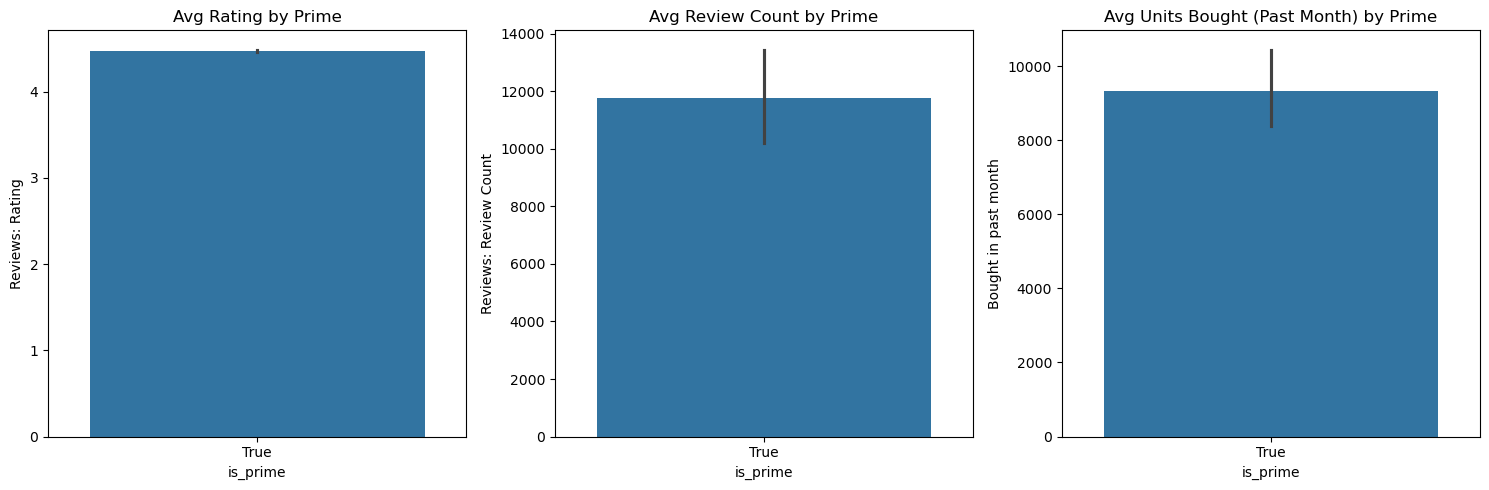

In [42]:
# Average rating grouped by Prime eligibility
prime_rating = df.groupby('is_prime')['Reviews: Rating'].mean()
print("Average Ratings by Prime Eligibility:\n", prime_rating)

# Average review count grouped by Prime eligibility
prime_reviews = df.groupby('is_prime')['Reviews: Review Count'].mean()
print("\nAverage Review Count by Prime Eligibility:\n", prime_reviews)

# Average monthly units bought grouped by Prime eligibility
prime_sales = df.groupby('is_prime')['Bought in past month'].mean()
print("\nAverage Units Bought in Past Month by Prime Eligibility:\n", prime_sales)

import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot comparing all three metrics
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x='is_prime', y='Reviews: Rating', data=df, ax=axs[0])
axs[0].set_title('Avg Rating by Prime')

sns.barplot(x='is_prime', y='Reviews: Review Count', data=df, ax=axs[1])
axs[1].set_title('Avg Review Count by Prime')

sns.barplot(x='is_prime', y='Bought in past month', data=df, ax=axs[2])
axs[2].set_title('Avg Units Bought (Past Month) by Prime')

plt.tight_layout()
plt.show()

In [44]:
import pandas as pd

# Clean brand names: strip spaces and lowercase for consistency
df['Brand'] = df['Brand'].fillna('Unknown').str.strip().str.title()

# Convert sales to numeric
df['Bought in past month'] = (
    df['Bought in past month']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)
    .replace('', '0')
    .astype(float)
)

# Bucket into sales segments
df['sales_bucket'] = pd.cut(
    df['Bought in past month'],
    bins=[-1, 100, 1000, 10000, float('inf')],
    labels=['Low (<100)', 'Medium (100–1k)', 'High (1k–10k)', 'Top (>10k)']
)

# Count products per brand per bucket
brand_sales = (
    df.groupby(['sales_bucket', 'Brand'])
    .size()
    .reset_index(name='product_count')
    .sort_values(['sales_bucket', 'product_count'], ascending=[True, False])
)

# Top 5 brands per bucket
top_brands_per_bucket = brand_sales.groupby('sales_bucket').head(5)

# Display
print(top_brands_per_bucket)


         sales_bucket                      Brand  product_count
193        Low (<100)            Nature'S Bounty              2
235        Low (<100)                    Omegaxl              2
244        Low (<100)                     Orgain              2
2          Low (<100)  365 By Whole Foods Market              1
10         Low (<100)          Amazon Basic Care              1
582   Medium (100–1k)                  Now Foods             11
413   Medium (100–1k)                    Carlyle              6
564   Medium (100–1k)                   Naturelo              5
477   Medium (100–1k)                   H' Habit              4
491   Medium (100–1k)                   Horbäach              4
913     High (1k–10k)                Nature Made             22
943     High (1k–10k)                  Now Foods             12
915     High (1k–10k)            Nature'S Bounty             11
989     High (1k–10k)        Pure Encapsulations             11
821     High (1k–10k)             Garden

/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_63272/3680525008.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sales_bucket', 'Brand'])
/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_63272/3680525008.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_brands_per_bucket = brand_sales.groupby('sales_bucket').head(5)


## How many products in each sales bucket?

In [46]:
# Count number of products in each sales bucket
sales_bucket_counts = df['sales_bucket'].value_counts().sort_index()

# Display the counts
print("📦 Product Count by Sales Bucket:")
print(sales_bucket_counts)

📦 Product Count by Sales Bucket:
sales_bucket
Low (<100)          45
Medium (100–1k)    242
High (1k–10k)      426
Top (>10k)         133
Name: count, dtype: int64


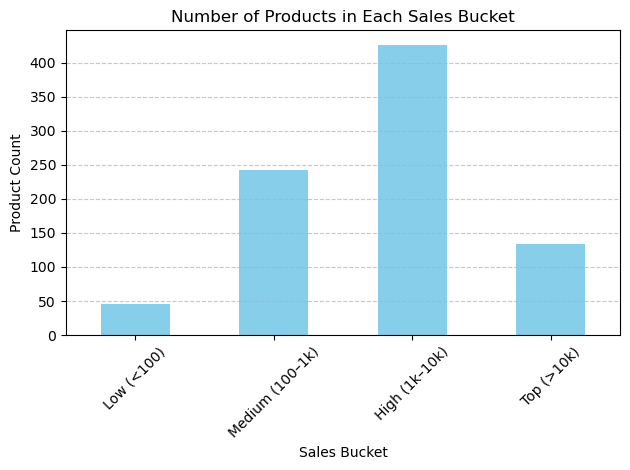

In [48]:
import matplotlib.pyplot as plt

sales_bucket_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Products in Each Sales Bucket")
plt.xlabel("Sales Bucket")
plt.ylabel("Product Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This indicates that a majority of products are in the High (1k–10k) sales bucket, with a relatively small tail in the Low bucket

## Number of unique brands

In [ ]:
# Number of unique brands
unique_brand_count = df['Brand'].nunique()
print(f"✅ Total unique brands: {unique_brand_count}")

# List of unique brand names
unique_brands = df['Brand'].dropna().unique()
print(sorted(unique_brands))

count    361.000000
mean       2.343490
std        3.179538
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       29.000000
Name: count, dtype: float64


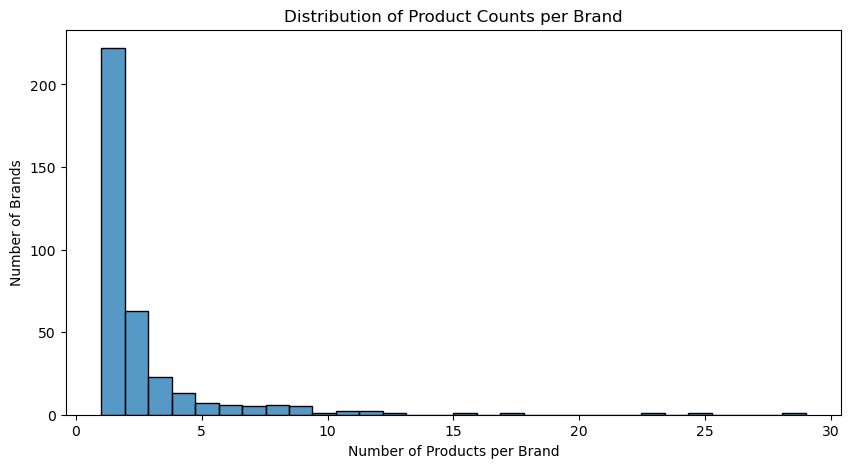

In [50]:
brand_counts = df['Brand'].value_counts()

# Summary statistics
print(brand_counts.describe())

# Optional: Plot distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(brand_counts, bins=30, kde=False)
plt.title("Distribution of Product Counts per Brand")
plt.xlabel("Number of Products per Brand")
plt.ylabel("Number of Brands")
plt.show()

	•	361 brands are in your dataset.
	•	~75% of brands have only 1–2 products listed.
	•	A small number of brands are responsible for a large number of products (one brand has 29!).
	•	This follows a long-tail distribution — a few dominant players and many fringe brands.

## Which brands dominate which sales buckets

In [52]:
import pandas as pd

# Group by Sales Bucket and Brand, count number of products
brand_sales = df.groupby(['sales_bucket', 'Brand'])['ASIN'].count().reset_index(name='product_count')

# Sort by Sales Bucket and then by Product Count descending
brand_sales_sorted = brand_sales.sort_values(['sales_bucket', 'product_count'], ascending=[True, False])

# Display top 10 brands for each bucket
top_brands_by_bucket = brand_sales_sorted.groupby('sales_bucket').head(10)

# Show the result
print(top_brands_by_bucket)

         sales_bucket                      Brand  product_count
193        Low (<100)            Nature'S Bounty              2
235        Low (<100)                    Omegaxl              2
244        Low (<100)                     Orgain              2
2          Low (<100)  365 By Whole Foods Market              1
10         Low (<100)          Amazon Basic Care              1
18         Low (<100)                    Aplenty              1
41         Low (<100)                     Biosil              1
42         Low (<100)                      Biote              1
43         Low (<100)           Biotics Research              1
59         Low (<100)                 Dailynutra              1
582   Medium (100–1k)                  Now Foods             11
413   Medium (100–1k)                    Carlyle              6
564   Medium (100–1k)                   Naturelo              5
477   Medium (100–1k)                   H' Habit              4
491   Medium (100–1k)                   

/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_63272/2636310224.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brand_sales = df.groupby(['sales_bucket', 'Brand'])['ASIN'].count().reset_index(name='product_count')
/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_63272/2636310224.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_brands_by_bucket = brand_sales_sorted.groupby('sales_bucket').head(10)


	Nature Made, NOW Foods, and Nature’s Bounty dominate both the High and Top buckets — indicating strong retail shelf space and visibility.
	•	Brands like Orgain, 365 by Whole Foods, and Amazon Basics appear only in Low — suggesting they might be newer, less competitive, or poorly marketed products.
	•	Product proliferation matters: some brands are spread across multiple buckets, while others focus only on the top end

## Number of Products in each format and sales bucket

In [54]:
import pandas as pd

# Create pivot table: product count by format and sales bucket
product_count_pivot = df.pivot_table(
    index='format',
    columns='sales_bucket',
    values='ASIN',  # assuming one row per ASIN
    aggfunc='count',
    fill_value=0,
    margins=True,              # Adds row/column totals
    margins_name='Total'      # Custom name for totals
)

# Display the table
print("📦 Product Count by Format and Sales Bucket (with Totals):")
print(product_count_pivot)

📦 Product Count by Format and Sales Bucket (with Totals):
sales_bucket  Low (<100)  Medium (100–1k)  High (1k–10k)  Top (>10k)  Total
format                                                                     
capsule               23              144            232          58    457
gummy                  1               27             43          26     97
liquid                 2                7             10           3     22
other                  5                4             10           2     21
powder                 2               13             21          13     49
softgel                8               23             40          14     85
tablet                 4               24             70          17    115
Total                 45              242            426         133    846


/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_63272/3150411723.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  product_count_pivot = df.pivot_table(


	•	Capsules dominate the supplements category with 456 products, accounting for more than half the total (456 of 841), and are especially concentrated in Medium (100–1k) and High (1k–10k) sales buckets. This suggests capsules are a highly saturated and competitively selling format.
	•	Tablets are the next most common format with 115 products, showing a strong presence in higher sales buckets, especially High (1k–10k), suggesting tablets are often associated with steady or strong performance.
	•	Gummies (95) and Softgels (85) are mid-sized formats in terms of count, with gummies more prominent in High and Top buckets, indicating higher consumer traction despite lower variety. Softgels are also skewed towards high performers.
	•	Liquid, Powder, and Other formats are less common, with fewer than 50 products each, yet many of them are present in the Top or High sales buckets—hinting these may be specialized or premium offerings.

## REVIEW COUNT - BEFORE & AFTER LOG TRANSFORMATION

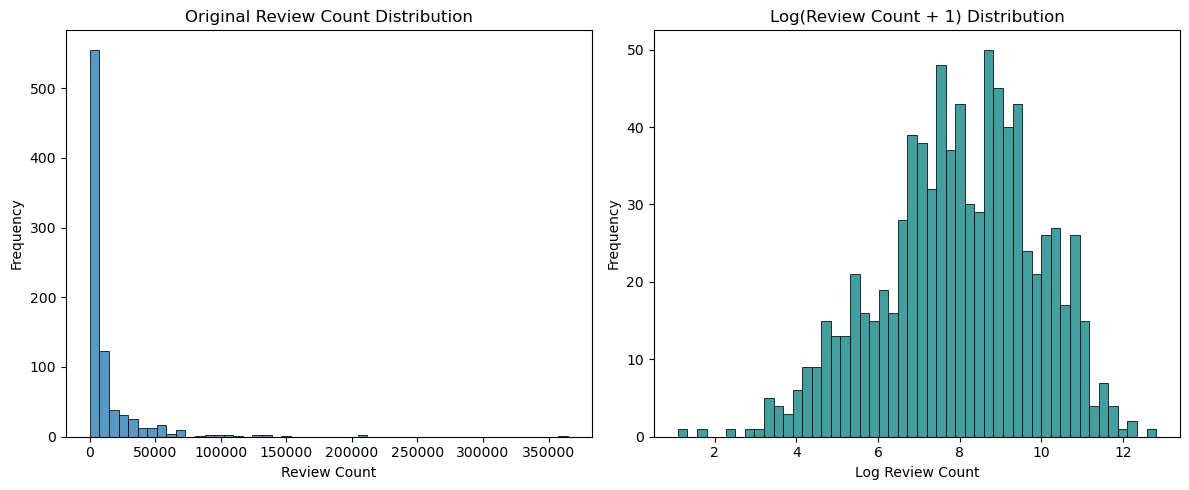

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming your review count column is named like this
df['review_count'] = pd.to_numeric(df['Reviews: Review Count'], errors='coerce')
df['log_review_count'] = np.log1p(df['review_count'])  # log(review_count + 1)

# Drop NaNs for plotting
plot_df = df.dropna(subset=['review_count', 'log_review_count'])

# Plot histograms
plt.figure(figsize=(12, 5))

# Original review count
plt.subplot(1, 2, 1)
sns.histplot(plot_df['review_count'], bins=50, kde=False)
plt.title("Original Review Count Distribution")
plt.xlabel("Review Count")
plt.ylabel("Frequency")

# Log-transformed review count
plt.subplot(1, 2, 2)
sns.histplot(plot_df['log_review_count'], bins=50, kde=False, color='teal')
plt.title("Log(Review Count + 1) Distribution")
plt.xlabel("Log Review Count")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## Are lower priced items reviewed more? 

Weak Negative Correlation (-0.079):
There’s a very slight tendency for lower-priced products to have higher review counts — but it’s not strong enough to be meaningful on its own.
Highly Skewed Distribution:
Most products are concentrated in the $10–$40 range, with a few outliers above $60.
Reviews are also extremely skewed, with some products having tens of thousands of reviews.

## Any correlation between Bought in past month and Reviews

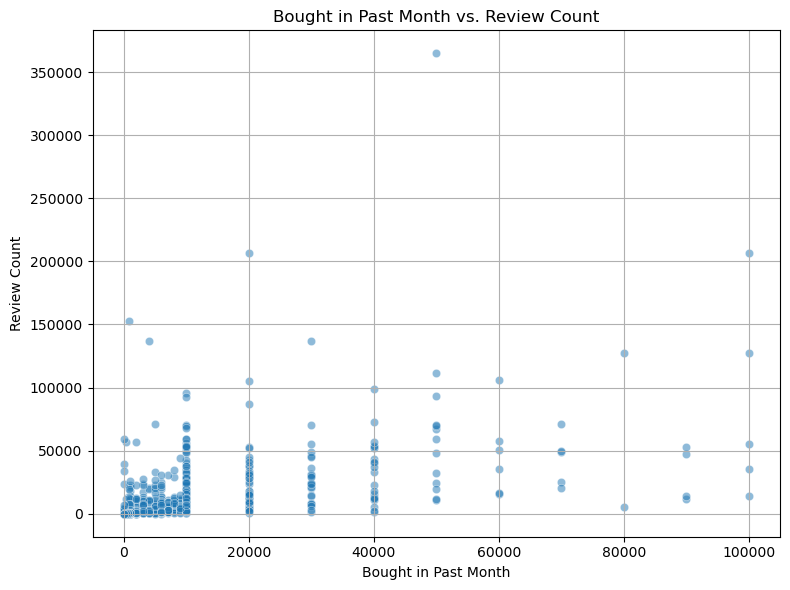

📊 Correlation between bought in past month and review count: 0.513


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values in either column
df_corr = df[['Bought in past month', 'Reviews: Review Count']].dropna()

# Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_corr, x='Bought in past month', y='Reviews: Review Count', alpha=0.5)
plt.title("Bought in Past Month vs. Review Count")
plt.xlabel("Bought in Past Month")
plt.ylabel("Review Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
correlation = df_corr['Bought in past month'].corr(df_corr['Reviews: Review Count'])
print(f"📊 Correlation between bought in past month and review count: {correlation:.3f}")

	•	Higher purchases tend to lead to more reviews — not surprising, but it’s confirmed quantitatively.
	•	The scatter is wide, meaning some products get bought a lot but not reviewed often, and others get many reviews with fewer purchases, possibly due to incentivized reviews, loyal fan bases, or long-term availability.

📊 Review Summary by Sales Bucket:
      sales_bucket          mean   median  count
0       Low (<100)   4189.288889    166.0     45
1  Medium (100–1k)   2876.297521    791.0    242
2    High (1k–10k)   9696.988263   4903.5    426
3       Top (>10k)  37167.751880  24023.0    133


/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_63272/3259133503.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_by_bucket = df.groupby('sales_bucket')['Reviews: Review Count'].agg(['mean', 'median', 'count']).reset_index()


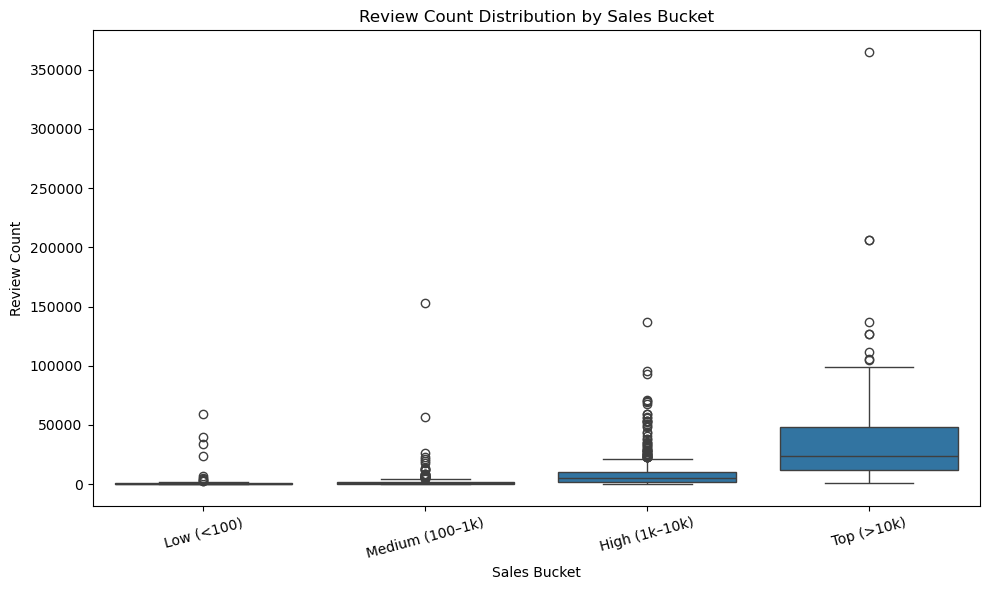

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by sales bucket and calculate summary stats
review_by_bucket = df.groupby('sales_bucket')['Reviews: Review Count'].agg(['mean', 'median', 'count']).reset_index()

print("📊 Review Summary by Sales Bucket:")
print(review_by_bucket)

# Plot: Boxplot of Review Count by Sales Bucket
plt.figure(figsize=(10, 6))
sns.boxplot(x='sales_bucket', y='Reviews: Review Count', data=df)
plt.title("Review Count Distribution by Sales Bucket")
plt.xlabel("Sales Bucket")
plt.ylabel("Review Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

	•	Top sellers have much higher review counts on average and median.
	•	Higher quartiles stretch further up in those buckets (as shown in the boxplot).
	•	This supports the hypothesis that review count is a strong proxy for product success.

## Percentage of products with video content by sales bucket

🎥 Percentage of Products with Video Content by Sales Bucket:
      sales_bucket  video_percentage
0       Low (<100)             100.0
1  Medium (100–1k)             100.0
2    High (1k–10k)             100.0
3       Top (>10k)             100.0


/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_63272/2935204488.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  video_stats = df.groupby('sales_bucket')['Has Main Video'].agg(['sum', 'count']).reset_index()
/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_63272/2935204488.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=video_stats, x='sales_bucket', y='video_percentage', palette='coolwarm')


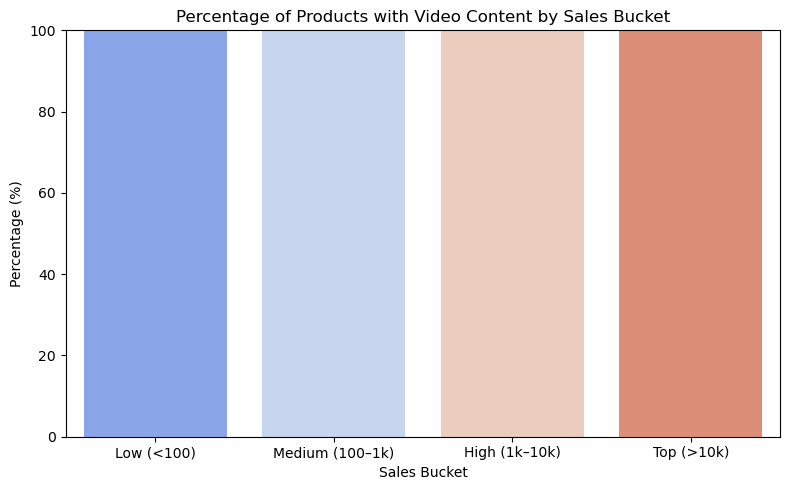

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure relevant columns are boolean
df['Has Main Video'] = df['Has Main Video'].astype(bool)

# Group by sales bucket and calculate percentage of products with videos
video_stats = df.groupby('sales_bucket')['Has Main Video'].agg(['sum', 'count']).reset_index()
video_stats['video_percentage'] = (video_stats['sum'] / video_stats['count']) * 100

# Print the result
print("🎥 Percentage of Products with Video Content by Sales Bucket:")
print(video_stats[['sales_bucket', 'video_percentage']])

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=video_stats, x='sales_bucket', y='video_percentage', palette='coolwarm')
plt.title("Percentage of Products with Video Content by Sales Bucket")
plt.ylabel("Percentage (%)")
plt.xlabel("Sales Bucket")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [66]:
print(df['Has Main Video'].value_counts())

Has Main Video
True    846
Name: count, dtype: int64


In [68]:
print(df['Video Count'].describe())
print(df['Main Videos'].head())
print(df['Additional Videos'].head())

count    846.000000
mean       6.790780
std        3.881982
min        0.000000
25%        3.000000
50%        8.000000
75%       10.000000
max       12.000000
Name: Video Count, dtype: float64
0                                                  NaN
1                                                  NaN
2    [{"title":"Centrum Mini's Silver Product Video...
3    [{"image":"61o6pkjbMLL.jpg","creator":"Main","...
4                                                  NaN
Name: Main Videos, dtype: object
0                                                  NaN
1    [{"title":"A must have for weight loss","image...
2    [{"title":"Easy to swallow!!","image":"71E9o6N...
3    [{"title":"Daily B Vitamin Support","image":"9...
4    [{"title":"My 65yo Mom Takes These Vitamins","...
Name: Additional Videos, dtype: object


In [70]:
df['has_video'] = df['Video Count'].fillna(0) > 0

In [72]:
video_stats = df.groupby('sales_bucket')['has_video'].agg(['sum', 'count']).reset_index()
video_stats['video_percentage'] = (video_stats['sum'] / video_stats['count']) * 100

/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_63272/3472991956.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  video_stats = df.groupby('sales_bucket')['has_video'].agg(['sum', 'count']).reset_index()


## Whether higher-selling products tend to include more video content

/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_63272/2832962556.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=video_stats, x='sales_bucket', y='video_percentage', palette='Blues_d')


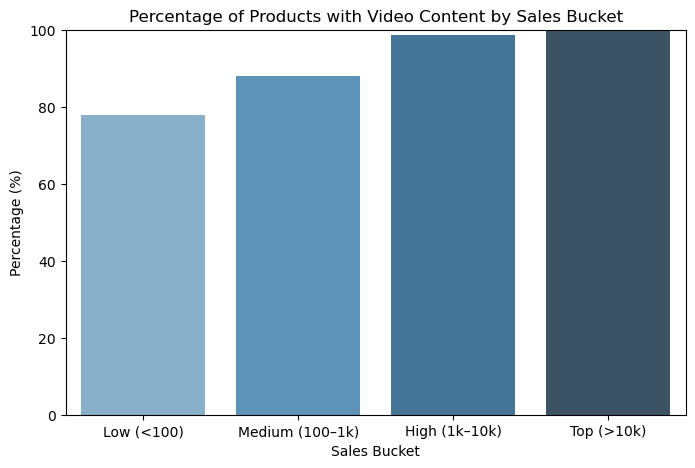

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=video_stats, x='sales_bucket', y='video_percentage', palette='Blues_d')
plt.title("Percentage of Products with Video Content by Sales Bucket")
plt.ylabel("Percentage (%)")
plt.xlabel("Sales Bucket")
plt.ylim(0, 100)
plt.show()

Higher-selling products are more likely to include video content.
	•	Products in the Low (<100) bucket: ~78% have videos.
	•	Products in the Top (>10k) bucket: ~100% have videos.

This implies that video content may support or correlate with higher product visibility, trust, or conversion.

## Whether high selling products tend to include A+

In [76]:
print(df['Has A+ Content'].value_counts(dropna=False))

Has A+ Content
yes    796
no      50
Name: count, dtype: int64


/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_63272/3140661491.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aplus_stats = df.groupby('sales_bucket')['has_aplus'].agg(['sum', 'count']).reset_index()
/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_63272/3140661491.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aplus_stats, x='sales_bucket', y='aplus_percentage', palette='Blues')


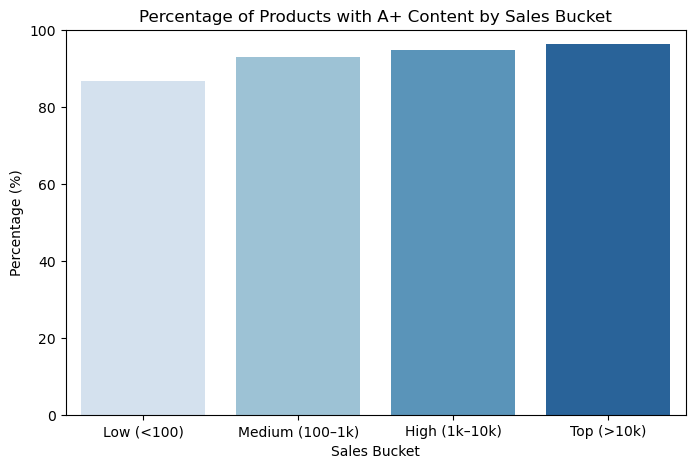

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert "yes"/"no" to boolean
df['has_aplus'] = df['Has A+ Content'].str.lower() == 'yes'

# Group by sales bucket and calculate A+ content percentage
aplus_stats = df.groupby('sales_bucket')['has_aplus'].agg(['sum', 'count']).reset_index()
aplus_stats['aplus_percentage'] = (aplus_stats['sum'] / aplus_stats['count']) * 100

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=aplus_stats, x='sales_bucket', y='aplus_percentage', palette='Blues')
plt.title('Percentage of Products with A+ Content by Sales Bucket')
plt.ylabel('Percentage (%)')
plt.xlabel('Sales Bucket')
plt.ylim(0, 100)
plt.show()

	Only ~87% of products in the Low (<100) sales bucket have A+ content.
	•	This climbs progressively across buckets:
	•	Medium (100–1k): ~93%
	•	High (1k–10k): ~95%
	•	Top (>10k): ~97%
	•	Implication:
	•	Top-selling products are more likely to invest in enhanced content like A+.
	•	This suggests a positive association between rich product detail pages and stronger sales performance.
	•	Brands aiming to grow in visibility or conversions may benefit from adding A+ content to their listings.

## Format breakdown across sales buckets

/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_63272/1964729836.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  format_counts = df.groupby(['sales_bucket', 'format'])['ASIN'].count().reset_index()


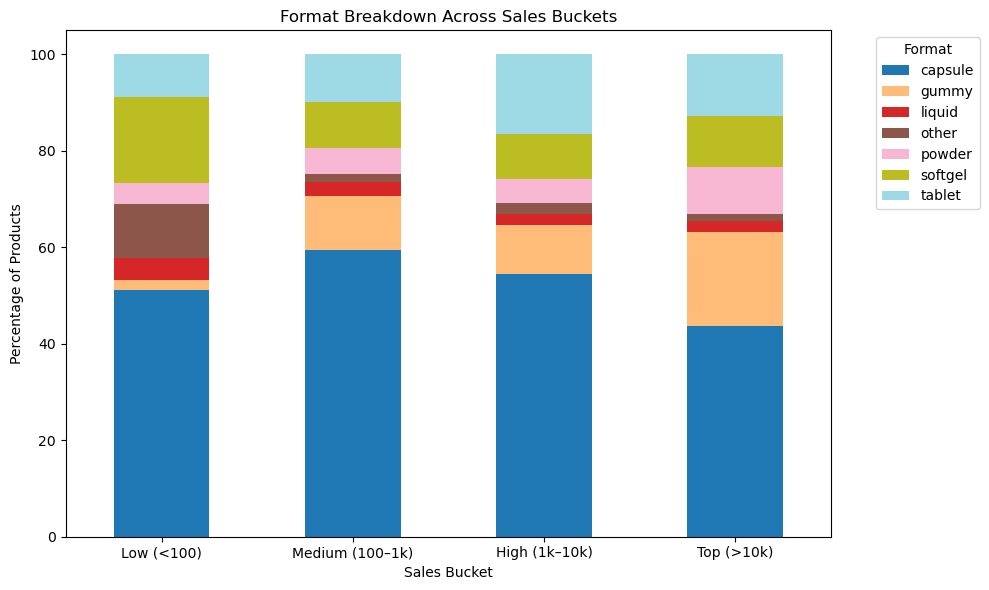

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count of formats by sales bucket
format_counts = df.groupby(['sales_bucket', 'format'])['ASIN'].count().reset_index()
format_counts = format_counts.rename(columns={'ASIN': 'product_count'})

# Pivot to make plotting easier (optional for stacked bar)
format_pivot = format_counts.pivot(index='sales_bucket', columns='format', values='product_count').fillna(0)

# Normalize to get % share if desired
format_pct = format_pivot.div(format_pivot.sum(axis=1), axis=0) * 100

# Plot: Stacked bar chart showing format distribution across sales buckets
format_pct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title("Format Breakdown Across Sales Buckets")
plt.ylabel("Percentage of Products")
plt.xlabel("Sales Bucket")
plt.legend(title="Format", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

📊 Interpretation: Format Breakdown Across Sales Buckets

🟦 Capsule (Blue)
	•	Most dominant format across all sales buckets.
	•	Strongest presence in the Medium (100–1k) group (~60%).
	•	Even in Top (>10k) sellers, capsules remain common, though their share drops to ~44%.
	•	This suggests capsules are the industry default, but other formats grow as products become more successful.

🟧 Gummy (Orange)
	•	Gummy formats gain share significantly in Top (>10k) products.
	•	Starts at a small % in low/medium buckets, but becomes second-largest format among top sellers.
	•	Indicates consumer preference and market success for more pleasant, chewable formats in top-selling supplements.

🟥 Liquid
	•	Very minimal share across all buckets.
	•	Indicates low consumer preference or niche positioning.

🟫 Other
	•	Present mostly in Low (<100) and Medium (100–1k) buckets.
	•	Likely includes less mainstream or inconsistently labeled formats.
	•	Drops significantly in High/Top buckets—suggesting these formats don’t scale well in popularity.

🟪 Powder
	•	Consistent small presence (~8–10%) across all buckets.
	•	Likely used in fitness/nutrition-specific categories where powders are standard (e.g., protein, collagen).

🟩 Softgel
	•	Strongest in Low and Medium buckets, but decreases in share with sales.
	•	May imply consumers gradually favor gummies/tablets over softgels as popularity increases.

🟦 Tablet (Light blue top band)
	•	Modest but consistent across all buckets (~10%).
	•	Tablets are not dominant but maintain steady presence, likely preferred by certain demographic/functional segments.

## Top 5 brands in each format based on the number of products they offer

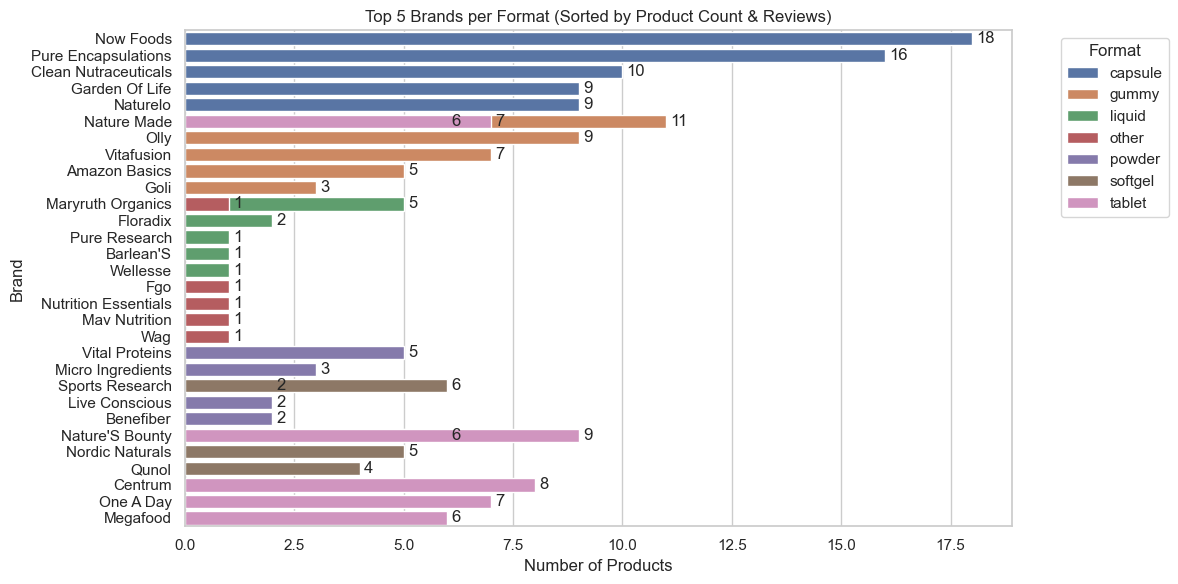

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group and aggregate
brand_format_stats = df.groupby(['format', 'Brand']).agg(
    product_count=('ASIN', 'count'),
    total_reviews=('Reviews: Review Count', 'sum')
).reset_index()

# Sort within each format
brand_format_sorted = brand_format_stats.sort_values(
    ['format', 'product_count', 'total_reviews'],
    ascending=[True, False, False]
)

# Take Top 5 per format
top_5_brands_per_format = brand_format_sorted.groupby('format').head(5)

# Plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
barplot = sns.barplot(
    data=top_5_brands_per_format,
    y='Brand',
    x='product_count',
    hue='format',
    dodge=False
)

# Annotate bars with product count outside
for container in barplot.containers:
    barplot.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Final touches
plt.title('Top 5 Brands per Format (Sorted by Product Count & Reviews)')
plt.xlabel('Number of Products')
plt.ylabel('Brand')
plt.legend(title='Format', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

	•	Capsule and tablet formats are the most competitive, with brands offering many variants.
	•	Gummies are growing, led by consumer-focused wellness brands.
	•	Liquid and powder formats are more niche—fewer brands dominate here, but they might serve loyal or specialized audiences.

🔹 Capsule
	•	Now Foods and Pure Encapsulations dominate capsules with 18 and 16 products respectively.
	•	Clean Nutraceuticals and Garden of Life are close behind.
	•	These brands have a strong capsule presence and likely broad product lines.

🔸 Gummy
	•	Nature Made, Olly, and Vitafusion top this list—brands that are well-known for gummy vitamins.
	•	These players have 7–11 gummy products, indicating specialization or popularity in this form.

🟩 Liquid
	•	Maryruth Organics leads here with 5 liquid products, followed by Floradix and others.
	•	Liquid format has fewer brands with high counts, suggesting a niche.

🔻 Other
	•	The “Other” category is scattered—brands here generally have just 1 product.
	•	This reflects more experimental or less common delivery methods.

🟪 Powder
	•	Vital Proteins stands out with 5 powder products—consistent with its collagen line.
	•	Micro Ingredients and others follow, suggesting focused specialization.

🟫 Softgel
	•	Sports Research and Micro Ingredients appear here, typically with fewer than 6 products.
	•	More fragmented but still active.

🟧 Tablet
	•	Nature’s Bounty, Centrum, and One A Day dominate tablet format.
	•	These legacy supplement brands have broad offerings and strong visibility.


## Average Price by Supplement Format

/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_98093/1386281124.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=price_summary, x='format', y='mean', palette='Blues_d', order=price_summary['format'])


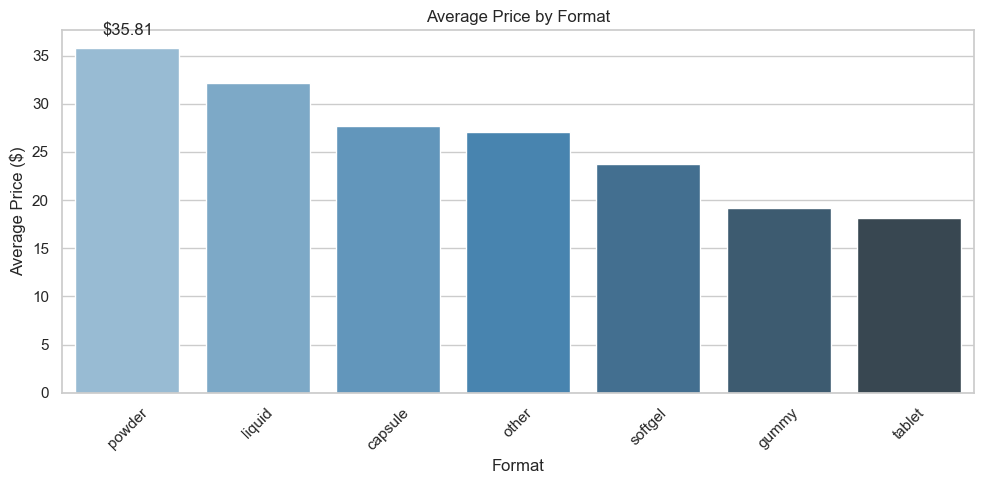

In [215]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure price column is numeric and format is not null
df['price'] = pd.to_numeric(df['New: Current'], errors='coerce')
df = df.dropna(subset=['price', 'format'])

# Summarize price
price_summary = df.groupby('format', as_index=False)['price'].agg(['mean', 'median', 'count']).reset_index()
price_summary = price_summary.sort_values(by='mean', ascending=False)

# Plot barplot in sorted order
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=price_summary, x='format', y='mean', palette='Blues_d', order=price_summary['format'])

# Add correct data labels using container
for bar, label in zip(barplot.containers[0], price_summary['mean']):
    height = bar.get_height()
    barplot.text(bar.get_x() + bar.get_width() / 2, height + 1, f"${label:.2f}", ha='center', va='bottom')

plt.title("Average Price by Format")
plt.ylabel("Average Price ($)")
plt.xlabel("Format")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [219]:

# Optional: Barplot of mean & median prices by format
price_summary = df.groupby('format')['price'].agg(['mean', 'median', 'count']).reset_index()
print("💲 Price Summary by Format:")
print(price_summary.sort_values(by='count', ascending=False))

💲 Price Summary by Format:
    format       mean  median  count
0  capsule  27.710833  23.990    456
6   tablet  18.116087  15.970    115
1    gummy  19.204000  16.050     95
5  softgel  23.754588  19.990     85
4   powder  35.812653  32.950     49
2   liquid  32.116818  28.175     22
3    other  27.060526  24.000     19


	•	Powder and Liquid formats are consistently more premium, suggesting higher margins or perceived value.
	•	Gummies and Tablets cater to price-sensitive consumers or brands with high volume, lower-cost strategies.

## Top 3 Brands' Price Vs Format's Median Price 

In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set your minimum review count threshold
REVIEW_THRESHOLD = 200

# Ensure required columns are numeric and clean
df['price'] = pd.to_numeric(df['New: Current'], errors='coerce')
df['Reviews: Review Count'] = pd.to_numeric(df['Reviews: Review Count'], errors='coerce')
df = df.dropna(subset=['price', 'format', 'Brand', 'Reviews: Review Count'])

# Filter by review threshold
filtered_df = df[df['Reviews: Review Count'] >= REVIEW_THRESHOLD]

# Step 1: Compute median price per format
format_median = filtered_df.groupby('format')['price'].median().reset_index().rename(columns={'price': 'format_median_price'})

# Step 2: Identify top 3 brands by count within each format
top_brands = (
    filtered_df.groupby(['format', 'Brand'])
    .size().reset_index(name='product_count')
    .sort_values(['format', 'product_count'], ascending=[True, False])
    .groupby('format').head(3)
)

# Step 3: Merge with original to compute brand avg price and review count
brand_price_summary = (
    filtered_df
    .merge(top_brands[['format', 'Brand']], on=['format', 'Brand'])
    .groupby(['format', 'Brand'])[['price']]
    .mean()
    .reset_index()
)

# Merge with format-level medians
brand_price_summary = brand_price_summary.merge(format_median, on='format')
brand_price_summary['price_diff_vs_median'] = brand_price_summary['price'] - brand_price_summary['format_median_price']


# Optional: show detailed comparison
print("🔍 Brand Price Comparison vs Format Median:")
print(brand_price_summary.sort_values(['format', 'price'], ascending=[True, False]))

🔍 Brand Price Comparison vs Format Median:
     format                 Brand      price  format_median_price  \
2   capsule   Pure Encapsulations  44.750000               23.990   
0   capsule  Clean Nutraceuticals  27.951000               23.990   
1   capsule             Now Foods  15.430625               23.990   
3     gummy           Nature Made  16.641818               15.965   
5     gummy            Vitafusion  12.322857               15.965   
4     gummy                  Olly  12.071111               15.965   
7    liquid              Floradix  42.025000               30.445   
8    liquid     Maryruth Organics  37.600000               30.445   
6    liquid             Barlean'S  13.990000               30.445   
9     other             Barlean'S  35.990000               26.425   
10    other            Dailynutra  32.990000               26.425   
11    other                   Fgo  23.990000               26.425   
13   powder     Micro Ingredients  37.296667               3

	•	Capsule:
	•	Pure Encapsulations has an average price of $44.75, which is $20.76 above the capsule median ($23.99) → positioned as a premium brand.
	•	Now Foods is $8.55 below the median → likely a value/affordable capsule brand.
	•	Gummy:
	•	Nature Made, Olly, and Vitafusion are all priced below the format median ($15.97) → suggests strong competition and price sensitivity in this segment.
	•	Liquid:
	•	Floradix and Maryruth Organics are both priced above the format median ($30.45) by $7–$11 → indicates they may offer premium or niche liquid supplements.
	•	Barlean'S is below median with a large product spread ($-16.45 and $9.56), showing possible wide price variance.
	•	Powder:
	•	All three brands (Micro Ingredients, Vital Proteins, Benefiber) are below or just above the format median ($32.94) → this market seems less premium-skewed compared to capsules or liquids.
	•	Softgel & Tablet:
	•	Nature Made and Nature's Bounty in both softgel and tablet formats are consistently priced below the format median, suggesting they aim to dominate through volume and affordability.

- Capsule and liquid formats show the greatest price spread among top brands — indicating a mix of premium and budget players.
	•	Gummy, tablet, and softgel formats are dominated by brands that price at or below the format median, possibly due to price-sensitive consumers.
	•	Premium brands like Pure Encapsulations, Floradix, and Maryruth Organics command significantly higher prices, suggesting value from niche formulation or trust.


## Average Price by Formats & Sales Buckets

In [244]:
price_sales_format = df.groupby(['format', 'sales_bucket'])['price'].agg(['mean', 'median', 'count']).reset_index()
print(price_sales_format)

     format     sales_bucket       mean  median  count
0   capsule       Low (<100)  39.314348  33.830     23
1   capsule  Medium (100–1k)  27.937692  23.990    143
2   capsule    High (1k–10k)  26.083060  23.680    232
3   capsule       Top (>10k)  29.061207  25.450     58
4     gummy       Low (<100)  13.980000  13.980      1
5     gummy  Medium (100–1k)  20.698462  21.745     26
6     gummy    High (1k–10k)  19.994186  17.970     43
7     gummy       Top (>10k)  16.499600  12.480     25
8    liquid       Low (<100)  14.470000  14.470      2
9    liquid  Medium (100–1k)  38.754286  39.870      7
10   liquid    High (1k–10k)  26.837000  23.840     10
11   liquid       Top (>10k)  45.993333  39.950      3
12    other       Low (<100)  22.316667  24.000      3
13    other  Medium (100–1k)  21.857500  21.990      4
14    other    High (1k–10k)  28.587000  23.490     10
15    other       Top (>10k)  36.950000  36.950      2
16   powder       Low (<100)  34.440000  34.440      2
17   powde

/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_98093/2038926044.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_sales_format = df.groupby(['format', 'sales_bucket'])['price'].agg(['mean', 'median', 'count']).reset_index()


- Capsules in the High and Top tiers are priced around ~$26–29. Lower tiers are significantly more expensive and likely struggling.
- Gummies get cheaper as they sell more — suggesting price sensitivity and possibly mass-market appeal.
- Liquid formats are highly variable in pricing and generally less common. High mean prices in the Top tier likely reflect specialized or premium offerings.
- Tablets are Consistently low-priced across all buckets, indicating a commoditized and mass-market format.
- Powders: Maintain high pricing across buckets, suggesting a premium niche positioning with loyal demand.
- Softgels: Moderately priced with stable presence in all tiers, indicating a balanced format appealing to both budget and quality-conscious buyers.


/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_98093/2503508078.py:11: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


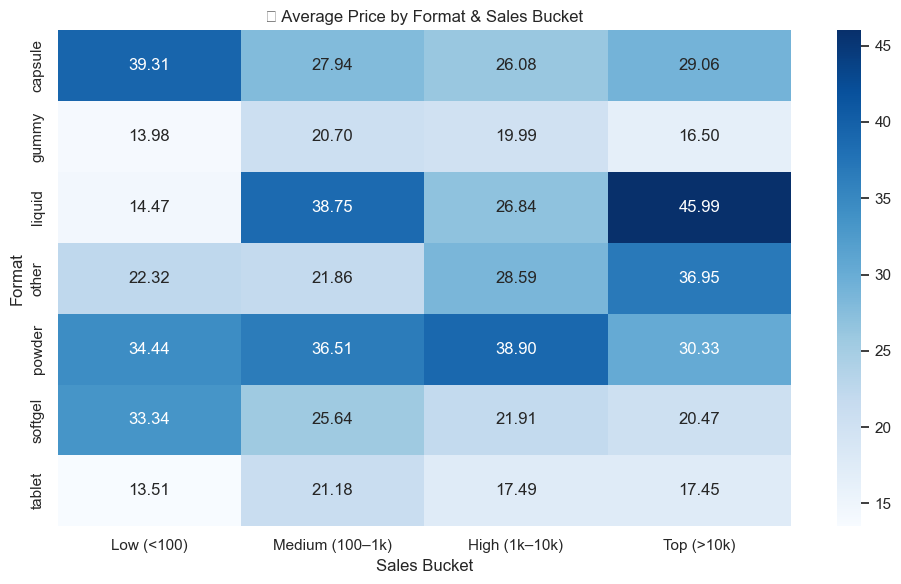

In [246]:
pivot = price_sales_format.pivot(index='format', columns='sales_bucket', values='mean')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="Blues")
plt.title("💰 Average Price by Format & Sales Bucket")
plt.xlabel("Sales Bucket")
plt.ylabel("Format")
plt.tight_layout()
plt.show()

- Across most formats, the Top (>10k) sales bucket has lower average prices than the Low (<100) or Medium (100–1k) sales buckets.
- If a brand wants to scale and enter the top sales tier, they may need to lower price points or offer high perceived value (e.g. via bundles, subscription deals, strong branding). Premium formats like liquid and powder can sustain higher pricing if they offer clear differentiation

## Prime Eligible & Subscribe and Save Vs Sales Buckets

In [257]:
print(df['Prime Eligible (Amazon offer)'].unique())
print(df['Subscribe and Save'].unique())

['yes' 'no']
['yes' 'no']


In [261]:
import pandas as pd

# Convert 'yes'/'no' to boolean True/False
df['is_prime'] = df['Prime Eligible (Amazon offer)'].str.lower() == 'yes'
df['is_subscribe_save'] = df['Subscribe and Save'].str.lower() == 'yes'

# Recreate the percentage tables
subscribe_table = df.groupby(['format', 'sales_bucket'])['is_subscribe_save'].agg(['sum', 'count']).reset_index()
subscribe_table['subscribe_%'] = round((subscribe_table['sum'] / subscribe_table['count']) * 100, 1)
subscribe_pivot = subscribe_table.pivot(index='format', columns='sales_bucket', values='subscribe_%').fillna(0)

prime_table = df.groupby(['format', 'sales_bucket'])['is_prime'].agg(['sum', 'count']).reset_index()
prime_table['prime_%'] = round((prime_table['sum'] / prime_table['count']) * 100, 1)
prime_pivot = prime_table.pivot(index='format', columns='sales_bucket', values='prime_%').fillna(0)

# Display
print("📦 Subscribe & Save (%) by Format and Sales Bucket")
print(subscribe_pivot)

print("\n🚚 Prime Eligible (%) by Format and Sales Bucket")
print(prime_pivot)

📦 Subscribe & Save (%) by Format and Sales Bucket
sales_bucket  Low (<100)  Medium (100–1k)  High (1k–10k)  Top (>10k)
format                                                              
capsule             87.0             94.4           94.4        94.8
gummy                0.0             96.2           90.7        88.0
liquid             100.0            100.0           90.0       100.0
other              100.0            100.0           90.0        50.0
powder             100.0             84.6           85.7       100.0
softgel             87.5             95.7           95.0       100.0
tablet             100.0            100.0           94.3       100.0

🚚 Prime Eligible (%) by Format and Sales Bucket
sales_bucket  Low (<100)  Medium (100–1k)  High (1k–10k)  Top (>10k)
format                                                              
capsule             91.3             95.1           95.3        98.3
gummy              100.0             96.2           93.0        92.0
liqu

/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_98093/3013437878.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subscribe_table = df.groupby(['format', 'sales_bucket'])['is_subscribe_save'].agg(['sum', 'count']).reset_index()
/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_98093/3013437878.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prime_table = df.groupby(['format', 'sales_bucket'])['is_prime'].agg(['sum', 'count']).reset_index()


# MODELLING

## Predict the likely sales performance tier (Low, Medium, High, Top) of a product using key features like format, price, Prime eligibility, visual content, ratings and reviews

In [312]:
# Corrected feature list using actual column names
actual_features = [
    'New: Current',                    # price
    'log_review_count',               # created during preprocessing
    'Video Count',
    'Reviews: Rating',
    'Subscribe and Save',
    'Prime Eligible (Amazon offer)',
    'Has A+ Content',
    'format',                         # engineered column
    'sales_bucket',                  # engineered column
    'Total Offer Count'
]

# Strip whitespace and convert to lowercase for consistency
df['Has Main Video Clean'] = df['Has Main Video'].astype(str).str.strip().str.lower()

# Check unique values
print("Unique cleaned values:", df['Has Main Video Clean'].unique())

# Count empty or missing values
missing_main_video = (df['Has Main Video Clean'] == '') | (df['Has Main Video Clean'].isin(['nan', 'none']))
print("🧹 Corrected Missing 'Has Main Video':", missing_main_video.sum())

# Check missing counts
missing_counts = df[actual_features].isnull().sum().sort_values(ascending=False)
rows_with_any_missing = df[actual_features].isnull().any(axis=1).sum()

print("🔍 Corrected Missing Values per Column:\n", missing_counts)
print(f"\n⚠️ Total rows with at least one missing value among selected features: {rows_with_any_missing}")

Unique cleaned values: ['nan']
🧹 Corrected Missing 'Has Main Video': 841
🔍 Corrected Missing Values per Column:
 New: Current                     0
log_review_count                 0
Video Count                      0
Reviews: Rating                  0
Subscribe and Save               0
Prime Eligible (Amazon offer)    0
Has A+ Content                   0
format                           0
sales_bucket                     0
Total Offer Count                0
dtype: int64

⚠️ Total rows with at least one missing value among selected features: 0


## RANDOM FOREST - 1


📊 Classification Report:
                 precision    recall  f1-score   support

  High (1k–10k)       0.71      0.88      0.79        86
     Low (<100)       0.33      0.11      0.17         9
Medium (100–1k)       0.71      0.62      0.67        48
     Top (>10k)       0.71      0.46      0.56        26

       accuracy                           0.70       169
      macro avg       0.62      0.52      0.54       169
   weighted avg       0.69      0.70      0.68       169



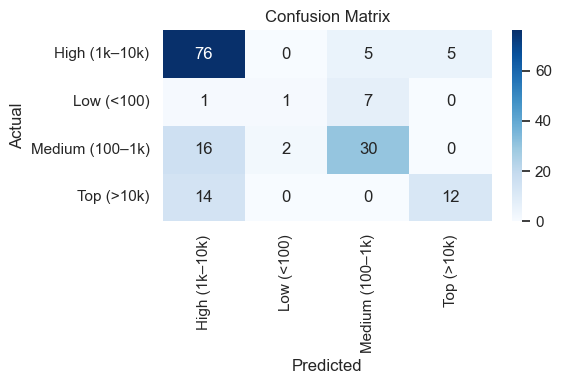


🔥 Top Feature Importances:
               Feature  Importance
2     log_review_count    0.374083
0                price    0.232810
7          Video Count    0.175079
1      Reviews: Rating    0.116908
10      format_capsule    0.018718
11        format_gummy    0.015745
16       format_tablet    0.013919
15      format_softgel    0.012722
9       Has A+ Content    0.012200
14       format_powder    0.012169
12       format_liquid    0.009552
13        format_other    0.006095
6   has_business_price    0.000000
5    is_subscribe_save    0.000000
4           has_coupon    0.000000
3             is_prime    0.000000
8       Has Main Video    0.000000


In [330]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Add log-transformed review count
df['Reviews: Review Count'] = df['Reviews: Review Count'].replace(0, 1)
df['log_review_count'] = np.log1p(df['Reviews: Review Count'])

# Feature selection
features = [
    'format', 'price', 'Reviews: Rating', 'log_review_count',
    'is_prime', 'has_coupon', 'is_subscribe_save',
    'has_business_price', 'Video Count', 'Has Main Video', 'Has A+ Content'
]
target = 'sales_bucket'

# Prepare model data
df_model = df[features + [target]].dropna(subset=[target])

# One-hot encode format
df_model = pd.get_dummies(df_model, columns=['format'])

# Convert yes/no to binary
binary_map = {'yes': 1, 'no': 0, True: 1, False: 0}
for col in ['is_prime', 'has_coupon', 'is_subscribe_save', 'has_business_price', 'Has Main Video', 'Has A+ Content']:
    df_model[col] = df_model[col].map(binary_map)

# Train/test split
X = df_model.drop(columns=[target])
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# Standardize numeric columns
scaler = StandardScaler()
X_train[['price', 'Video Count', 'Reviews: Rating', 'log_review_count']] = scaler.fit_transform(
    X_train[['price', 'Video Count', 'Reviews: Rating', 'log_review_count']]
)
X_test[['price', 'Video Count', 'Reviews: Rating', 'log_review_count']] = scaler.transform(
    X_test[['price', 'Video Count', 'Reviews: Rating', 'log_review_count']]
)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Feature importance
feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n🔥 Top Feature Importances:")
print(feat_importance)

## RANDOM FOREST - 2

In [418]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 1: Feature Selection
features = [
    'price', 'log_review_count', 'Video Count', 'Reviews: Rating',
    'Subscribe and Save', 'Prime Eligible (Amazon offer)', 'Has A+ Content',
    'format', 'Total Offer Count'
]
target = 'sales_bucket'

# Step 2: Clean Data
df_model = df[features + [target]].dropna()
binary_map = {'yes': 1, 'no': 0}
for col in ['Subscribe and Save', 'Prime Eligible (Amazon offer)', 'Has A+ Content']:
    df_model[col] = df_model[col].astype(str).str.strip().str.lower().map(binary_map)

df_model[target] = df_model[target].replace({
    'High (1k–10k)': 1, 'Top (>10k)': 1,
    'Low (<100)': 0, 'Medium (100–1k)': 0
})

df_model = pd.get_dummies(df_model, columns=['format'])

# Step 3: Split and Scale
X = df_model.drop(columns=[target])
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

numeric_cols = ['price', 'log_review_count', 'Video Count', 'Reviews: Rating', 'Total Offer Count']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Step 4: Model Training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 5: Evaluation
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)[:, 1]

print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ AUC Score:", round(roc_auc_score(y_test, y_probs), 3))

# Step 6: Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n🔥 Top Feature Importances:")
print(feature_importances.head(10))

✅ Confusion Matrix:
 [[ 33  24]
 [ 12 100]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.58      0.65        57
           1       0.81      0.89      0.85       112

    accuracy                           0.79       169
   macro avg       0.77      0.74      0.75       169
weighted avg       0.78      0.79      0.78       169

✅ AUC Score: 0.819

🔥 Top Feature Importances:
                          Feature  Importance
1                log_review_count    0.363637
2                     Video Count    0.234855
0                           price    0.163871
3                 Reviews: Rating    0.096724
7               Total Offer Count    0.071245
8                  format_capsule    0.014715
14                  format_tablet    0.010607
9                    format_gummy    0.009643
13                 format_softgel    0.008582
5   Prime Eligible (Amazon offer)    0.007002


/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_98093/2807984687.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_model[target] = df_model[target].replace({
/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_98093/2807984687.py:22: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_model[target] = df_model[target].replace({


## XG BOOST - 1

In [328]:
!pip install xgboost

✅ Rows available for modeling: 841

📊 Classification Report:
                 precision    recall  f1-score   support

  High (1k–10k)       0.63      0.69      0.66        86
     Low (<100)       0.20      0.11      0.14         9
Medium (100–1k)       0.56      0.58      0.57        48
     Top (>10k)       0.55      0.42      0.48        26

       accuracy                           0.59       169
      macro avg       0.48      0.45      0.46       169
   weighted avg       0.57      0.59      0.58       169



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:40:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


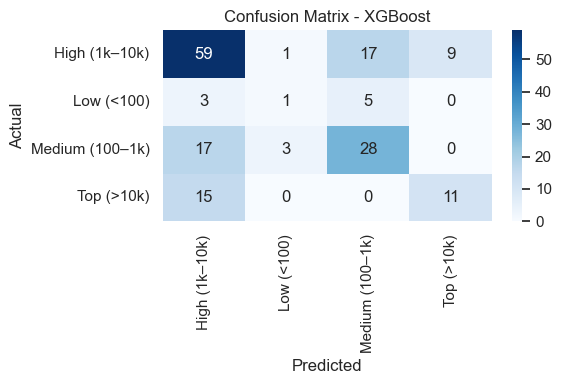


🔥 Top Feature Importances:
                          Feature  Importance
2                     Video Count    0.117836
1                log_review_count    0.109785
13                 format_softgel    0.089061
12                  format_powder    0.082234
10                  format_liquid    0.070860
5   Prime Eligible (Amazon offer)    0.069554
9                    format_gummy    0.069340
14                  format_tablet    0.066499
4              Subscribe and Save    0.061945
3                 Reviews: Rating    0.060616
7               Total Offer Count    0.056669
0                           price    0.053491
8                  format_capsule    0.048577
11                   format_other    0.043535
6                  Has A+ Content    0.000000


In [344]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# --- Step 1: Preprocessing ---
df['Reviews: Review Count'] = df['Reviews: Review Count'].replace(0, 1)
df['log_review_count'] = np.log1p(df['Reviews: Review Count'])

# --- Step 2: Selected Features ---
features = [
    'price', 'log_review_count', 'Video Count', 'Reviews: Rating',
    'Subscribe and Save', 'Prime Eligible (Amazon offer)',
    'Has A+ Content', 'format', 'Total Offer Count'
]
target = 'sales_bucket'

# Drop rows where any selected column is missing
df_model = df[features + [target]].dropna()

# --- Step 3: Encode binary yes/no features ---
binary_map = {'yes': 1, 'no': 0, True: 1, False: 0}
for col in ['Subscribe and Save', 'Prime Eligible (Amazon offer)', 'Has A+ Content']:
    df_model[col] = df_model[col].astype(str).str.strip().str.lower().map(binary_map)

# One-hot encode 'format'
df_model = pd.get_dummies(df_model, columns=['format'])

# --- Step 4: Encode target variable ---
le = LabelEncoder()
y = le.fit_transform(df_model[target])
X = df_model.drop(columns=[target])

# --- Step 5: Train/test split ---
print("✅ Rows available for modeling:", len(df_model))
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# --- Step 6: Standardize numeric features ---
numeric_cols = ['price', 'log_review_count', 'Video Count', 'Reviews: Rating', 'Total Offer Count']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# --- Step 7: Train XGBoost ---
clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
clf.fit(X_train, y_train)

# --- Step 8: Evaluate ---
y_pred = clf.predict(X_test)
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.tight_layout()
plt.show()

# --- Step 9: Feature Importance ---
feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n🔥 Top Feature Importances:")
print(feat_importance)

## XG BOOST 2

In [412]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier

# Step 1: Select features and target
features = [
    'New: Current',                 # price
    'log_review_count',
    'Video Count',
    'Reviews: Rating',
    'Subscribe and Save',
    'Prime Eligible (Amazon offer)',
    'Has A+ Content',
    'format',
    'Total Offer Count'
]
target = 'sales_bucket'

# Step 2: Prepare data
df = df.copy()
df['Reviews: Review Count'] = df['Reviews: Review Count'].replace(0, 1)
df['log_review_count'] = np.log1p(df['Reviews: Review Count'])
df_model = df[features + [target]].dropna()

# Step 3: Rename & map binary variables
df_model = df_model.rename(columns={'New: Current': 'price'})
binary_map = {'yes': 1, 'no': 0, True: 1, False: 0}
for col in ['Subscribe and Save', 'Prime Eligible (Amazon offer)', 'Has A+ Content']:
    df_model[col] = df_model[col].astype(str).str.strip().str.lower().map(binary_map)

# Step 4: One-hot encode format
df_model = pd.get_dummies(df_model, columns=['format'])

# Step 5: Convert target to binary
df_model[target] = df_model[target].replace({
    'High (1k–10k)': 1, 'Top (>10k)': 1,
    'Medium (100–1k)': 0, 'Low (<100)': 0
})

# Step 6: Train/Test Split
X = df_model.drop(columns=[target])
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 7: Scale numeric columns
numeric_cols = ['price', 'log_review_count', 'Video Count', 'Reviews: Rating', 'Total Offer Count']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Step 8: Train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Step 9: Evaluation
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ AUC Score:", round(roc_auc_score(y_test, y_probs), 3))

# Step 10: Feature Importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n🔥 Top Feature Importances:")
print(importance_df.head(10))

✅ Confusion Matrix:
 [[33 24]
 [17 95]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.58      0.62        57
           1       0.80      0.85      0.82       112

    accuracy                           0.76       169
   macro avg       0.73      0.71      0.72       169
weighted avg       0.75      0.76      0.75       169


✅ AUC Score: 0.803

🔥 Top Feature Importances:
              Feature  Importance
1    log_review_count    0.214062
2         Video Count    0.121883
3     Reviews: Rating    0.110283
8      format_capsule    0.090447
12      format_powder    0.089977
7   Total Offer Count    0.074562
0               price    0.070603
9        format_gummy    0.067254
14      format_tablet    0.057095
13     format_softgel    0.049342


/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_98093/125853482.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_model[target] = df_model[target].replace({
/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_98093/125853482.py:38: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_model[target] = df_model[target].replace({
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:12:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not use

## LOGISTIC REGRESSION 1 - 4 BUCKETS

In [322]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# --- Define feature columns and target ---
features = [
    'price',                   # price
    'log_review_count',
    'Video Count',
    'Reviews: Rating',
    'Subscribe and Save',
    'Prime Eligible (Amazon offer)',
    'Has A+ Content',
    'format',
    'Total Offer Count'
]
target = 'sales_bucket'

# --- Drop rows with missing in selected features or target ---
df_model = df[features + [target]].dropna()

# --- Preprocessing ---
# Binary fields as 0/1
binary_map = {'yes': 1, 'no': 0}
for col in ['Subscribe and Save', 'Prime Eligible (Amazon offer)', 'Has A+ Content']:
    df_model[col] = df_model[col].astype(str).str.strip().str.lower().map(binary_map)

# Split features & target
X = df_model[features]
y = df_model[target]

# Define preprocessing for numeric and categorical columns
numeric_features = ['price', 'log_review_count', 'Video Count', 'Reviews: Rating', 'Total Offer Count']
categorical_features = ['format']

preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='mean'), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# --- Create pipeline ---
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, multi_class='multinomial'))
])

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# --- Fit model ---
pipeline.fit(X_train, y_train)

# --- Predict & evaluate ---
y_pred = pipeline.predict(X_test)

print("🧾 Classification Report:\n", classification_report(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

🧾 Classification Report:
                  precision    recall  f1-score   support

  High (1k–10k)       0.66      0.84      0.74        86
     Low (<100)       1.00      0.11      0.20         9
Medium (100–1k)       0.63      0.54      0.58        48
     Top (>10k)       0.72      0.50      0.59        26

       accuracy                           0.66       169
      macro avg       0.75      0.50      0.53       169
   weighted avg       0.68      0.66      0.64       169

📊 Confusion Matrix:
 [[72  0  9  5]
 [ 2  1  6  0]
 [22  0 26  0]
 [13  0  0 13]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


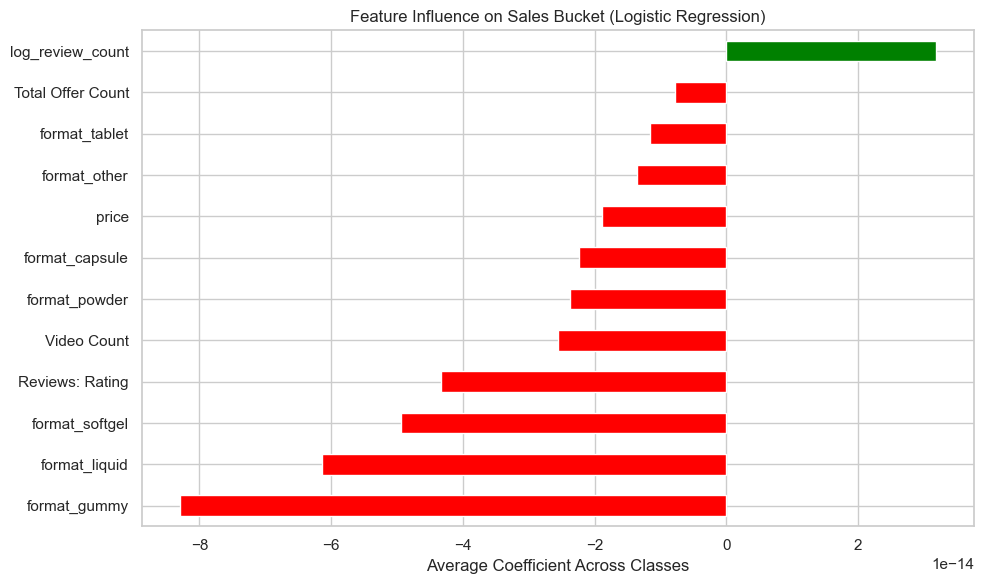

In [355]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get the trained logistic regression model
log_reg = pipeline.named_steps['classifier']

# Get the feature names after preprocessing
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
encoded_cats = ohe.get_feature_names_out(['format'])

feature_names = numeric_features + list(encoded_cats)

# Get coefficients
coef_df = pd.DataFrame(log_reg.coef_.T, index=feature_names, columns=log_reg.classes_)
coef_df['Mean Impact'] = coef_df.mean(axis=1)
coef_df = coef_df.sort_values(by='Mean Impact')

# Plot
plt.figure(figsize=(10, 6))
coef_df['Mean Impact'].plot(kind='barh', color=np.where(coef_df['Mean Impact'] > 0, 'green', 'red'))
plt.title("Feature Influence on Sales Bucket (Logistic Regression)")
plt.xlabel("Average Coefficient Across Classes")
plt.tight_layout()
plt.show()

## LOGISTIC REGRESSION - 2 - WHETHER BEST SELLING OR NOT?

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.56      0.65        57
           1       0.80      0.91      0.85       112

    accuracy                           0.79       169
   macro avg       0.78      0.74      0.75       169
weighted avg       0.79      0.79      0.78       169

📊 Confusion Matrix:
 [[ 32  25]
 [ 10 102]]


/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_98093/1488284427.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_model[target] = df_model[target].replace({
/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_98093/1488284427.py:31: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_model[target] = df_model[target].replace({


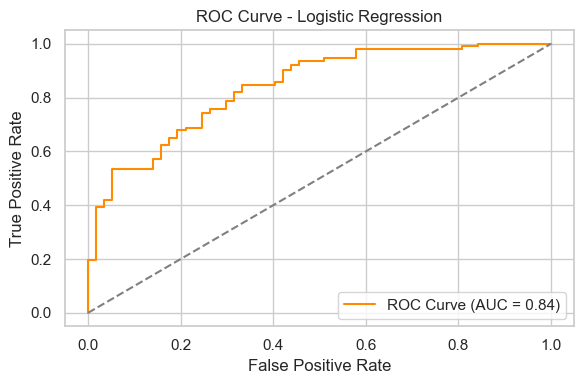

/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_98093/1488284427.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')


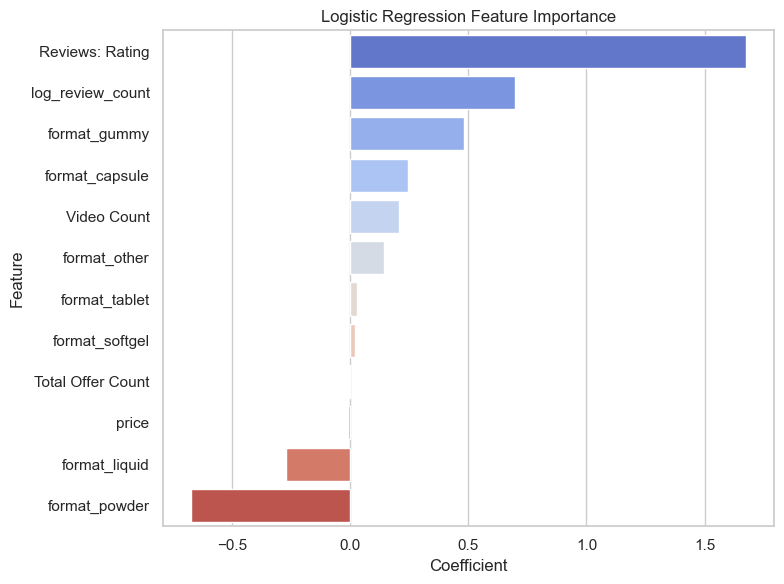

In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

# --- Define features and target ---
features = [
    'price', 'log_review_count', 'Video Count', 'Reviews: Rating',
    'Subscribe and Save', 'Prime Eligible (Amazon offer)', 'Has A+ Content',
    'format', 'Total Offer Count'
]
target = 'sales_bucket'

# --- Clean & align dataset ---
df_model = df[features + [target]].dropna().copy()

# --- Binary encode yes/no columns ---
binary_map = {'yes': 1, 'no': 0}
for col in ['Subscribe and Save', 'Prime Eligible (Amazon offer)', 'Has A+ Content']:
    df_model[col] = df_model[col].astype(str).str.strip().str.lower().map(binary_map)

# --- Convert sales_bucket to binary classification ---
df_model[target] = df_model[target].replace({
    'High (1k–10k)': 1, 'Top (>10k)': 1,
    'Low (<100)': 0, 'Medium (100–1k)': 0
})

# --- Split data ---
X = df_model[features]
y = df_model[target]

numeric_features = ['price', 'log_review_count', 'Video Count', 'Reviews: Rating', 'Total Offer Count']
categorical_features = ['format']

preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='mean'), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# --- Fit model ---
pipeline.fit(X_train, y_train)

# --- Evaluate model ---
y_pred = pipeline.predict(X_test)
print("🧾 Classification Report:\n", classification_report(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# --- ROC Curve ---
y_probs = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# --- Feature Importance ---
model = pipeline.named_steps['classifier']
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(['format'])
feature_names = numeric_features + list(cat_feature_names)

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Logistic Regression Feature Importance')
plt.tight_layout()
plt.show()

Model Strength:
An AUC of 0.85 indicates strong classification ability. The model performs well in separating best-selling (≥1k sales) vs. non-best-selling (<1k sales) products.
	•	True Positive Rate (Sensitivity):
The curve rises quickly, which means the model correctly identifies a large portion of true best-sellers with relatively few false positives.
	•	Balanced Trade-off:
Since the curve stays well above the diagonal line, your logistic regression model is significantly better than random chance and makes useful predictions.


# CLUSTERING

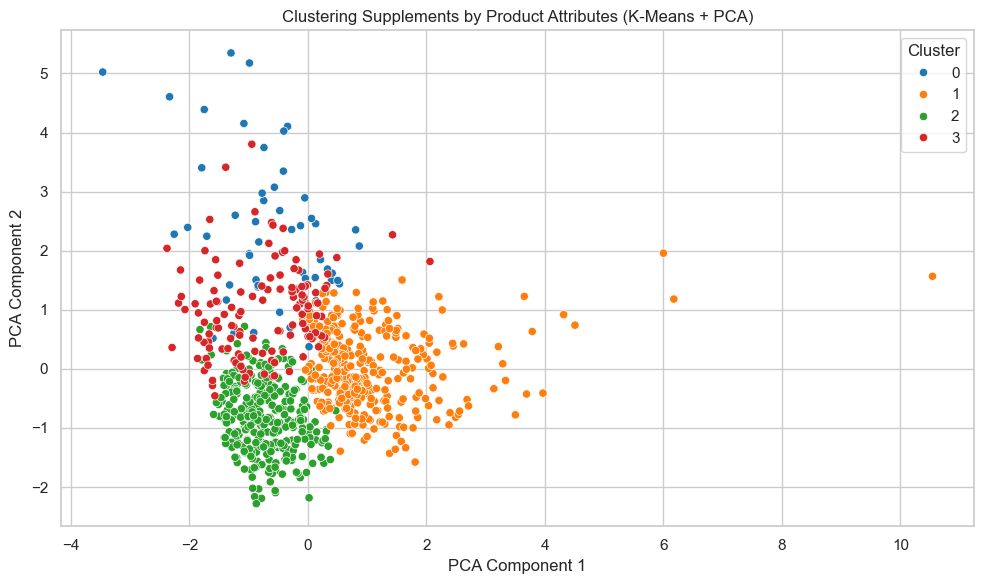

📊 Cluster Summary:
            price  Reviews: Rating  Reviews: Review Count  Video Count
cluster                                                               
0        2.696692        -0.430123              -0.285371     0.262246
1       -0.188709         0.372349               0.474092     0.864811
2       -0.326749         0.338701              -0.374097    -0.998997
3        0.116423        -1.626960              -0.275021    -0.090516


In [362]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# === Select Features for Clustering ===
features = ['price', 'Reviews: Rating', 'Reviews: Review Count', 'Video Count', 'format']
df_cluster = df[features].dropna()

# === One-Hot Encode 'format' ===
df_cluster = pd.get_dummies(df_cluster, columns=['format'], drop_first=True)

# === Normalize Numerical Features ===
scaler = StandardScaler()
num_cols = ['price', 'Reviews: Rating', 'Reviews: Review Count', 'Video Count']
df_cluster[num_cols] = scaler.fit_transform(df_cluster[num_cols])

# === Run KMeans Clustering ===
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster)

# === Reduce to 2D Using PCA ===
pca = PCA(n_components=2)
components = pca.fit_transform(df_cluster.drop(columns='cluster'))
df_cluster['PCA1'] = components[:, 0]
df_cluster['PCA2'] = components[:, 1]

# === Visualize Clusters ===
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='PCA1', y='PCA2', hue='cluster', palette='tab10')
plt.title("Clustering Supplements by Product Attributes (K-Means + PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# === Cluster Summaries ===
cluster_summary = df_cluster.groupby('cluster')[num_cols].mean()
print("📊 Cluster Summary:")
print(cluster_summary)

	•	Cluster 0 (Premium, Low-Rated): Expensive products that are not well-rated. Could be new entrants or over-priced.
	•	Cluster 1 (Popular, Trusted): Affordable, highly rated, highly reviewed, and video-rich — likely best-sellers.
	•	Cluster 2 (Budget, Low-Content): Cheap and decent-rated but not much content or reviews — may be undiscovered or new.
	•	Cluster 3 (Unrated/Low Quality): Very low ratings, low everything — possibly poor quality or outdated listings.

In [369]:
features = ['price', 'Reviews: Rating', 'Reviews: Review Count', 'Video Count']

from sklearn.preprocessing import StandardScaler

# Select your features
X = df[features].dropna()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster info back to original DataFrame
df_clustered = df.loc[X.index].copy()
df_clustered['cluster'] = cluster_labels

pd.crosstab(df_clustered['cluster'], df_clustered['format'], normalize='index') * 100

format,capsule,gummy,liquid,other,powder,softgel,tablet
cluster,,,,,,,
0,71.666667,1.666667,5.000000,1.666667,10.000000,6.666667,3.333333
1,57.232704,8.805031,0.943396,1.572327,1.886792,11.949686,17.610063
2,46.666667,13.623188,3.478261,2.318841,8.405797,11.014493,14.492754
3,59.322034,16.101695,3.389831,4.237288,6.779661,4.237288,5.932203


From the chart and table, it’s clear that:
	•	Cluster 0 is dominated by capsules (~72%), with very little representation from gummies or tablets.
	•	These products may reflect traditional supplement formats—possibly budget-friendly or standard offerings.
	•	Cluster 3 has the highest proportion of gummies (16%) and lower capsule share.
	•	Likely represents modern, lifestyle-driven supplements (e.g., trendy gummy vitamins).
	•	Cluster 2 blends tablets (14.5%) and gummies (13.6%), indicating a hybrid space—possibly emerging products balancing tradition and innovation.

This suggests consumers may naturally segment into format preferences, and product positioning aligns with those patterns.

 Insight 2: Attribute-Based Clusters Correspond to Format Strategy

From the PCA + KMeans clustering image:
	•	Clusters formed solely on numeric attributes (price, rating, review count, video count), without giving the model any format info.
	•	Yet, when you checked format distribution within clusters, strong patterns still emerged.

👉 What this means:
Even when clustering ignores “format”, product attributes like price and reviews implicitly reflect format strategies. For example:
	•	Capsules → Found in cheaper, legacy clusters.
	•	Gummies/Tablets → Tend to appear in clusters with higher reviews or different pricing.

This supports the idea that format isn’t just a surface-level trait—it’s tied to how products compete and are perceived in the market.

In [375]:
pd.crosstab(df_clustered['cluster'], df_clustered['sales_bucket'], normalize='index') * 100

sales_bucket,Low (<100),Medium (100–1k),High (1k–10k),Top (>10k)
cluster,,,,
0,8.333333,30.000000,50.000000,11.666667
1,6.918239,48.427673,44.654088,0.000000
2,1.159420,8.115942,58.260870,32.463768
3,10.169492,33.898305,44.915254,11.016949


Cluster 2 is a high-performing but low-visibility group. These are supplements that don’t rely heavily on videos or large review volumes, but are still doing great in sales.
They might be benefiting from strong external marketing, offline trust, brand reputation, or simply great value propositions.

/var/folders/pm/4n7y323n5bl6rj1_zg7lh7zm0000gn/T/ipykernel_98093/554782372.py:52: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


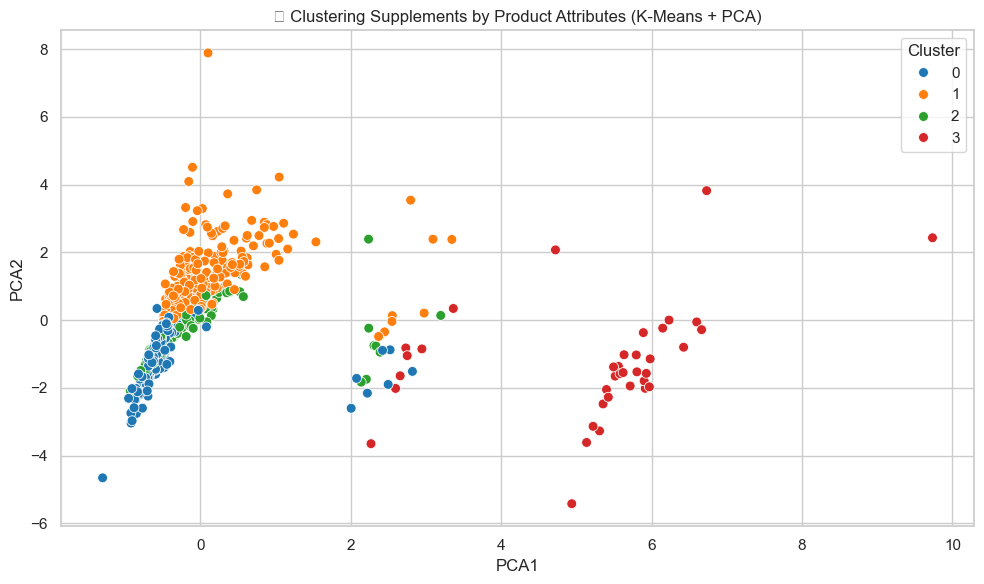

📊 Cluster Summary:



,price,Reviews: Rating,Reviews: Review Count,Video Count,Prime Eligible (Amazon offer),Subscribe and Save,Total Offer Count
cluster,,,,,,,
0,42.819,4.245,5331.739,8.070,1.000,0.955,2.013
1,21.796,4.557,25020.343,10.118,1.000,0.978,4.866
2,20.640,4.510,2559.385,2.898,1.000,0.978,2.643
3,29.251,4.482,6581.079,7.053,0.053,0.184,9.632


In [378]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Select features for clustering ---
features = [
    'price',
    'Reviews: Rating',
    'Reviews: Review Count',
    'Video Count',
    'Prime Eligible (Amazon offer)',
    'Subscribe and Save',
    'Total Offer Count'
]

# --- Prepare DataFrame ---
df_cluster = df[features].copy()

# Map binary features: yes/no → 1/0
binary_map = {'yes': 1, 'no': 0, True: 1, False: 0}
for col in ['Prime Eligible (Amazon offer)', 'Subscribe and Save']:
    df_cluster[col] = df_cluster[col].astype(str).str.strip().str.lower().map(binary_map)

# Handle missing values (if any)
df_cluster = df_cluster.dropna()

# --- Normalize ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# --- Clustering ---
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
df_clustered = df_cluster.copy()
df_clustered['cluster'] = cluster_labels

# --- PCA for 2D Visualization ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_clustered['PCA1'] = X_pca[:, 0]
df_clustered['PCA2'] = X_pca[:, 1]

# --- Plot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clustered, x='PCA1', y='PCA2', hue='cluster', palette='tab10', s=50)
plt.title("📦 Clustering Supplements by Product Attributes (K-Means + PCA)")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# --- Cluster Summary ---
summary = df_clustered.groupby('cluster')[features].mean()
print("📊 Cluster Summary:\n")
display(summary.round(3))

	•	Prime & Subscribe-and-Save sharpened cluster separation by exposing fulfillment/channel gaps (e.g., Cluster 3).
	•	Offer Count helped differentiate saturation or seller competition.
	•	Clear business implications:
	•	Cluster 1: 🌟 Push more
	•	Cluster 0: 💎 Refine marketing
	•	Cluster 2: 🚀 Opportunity to nurture
	•	Cluster 3: ⚠️ Quality control needed

In [385]:
import pandas as pd

# Create crosstab: % distribution of sales_bucket within each cluster
sales_cluster_table = pd.crosstab(
    df_clustered['cluster'],
    df_clustered['sales_bucket'],
    normalize='index'  # row-wise percentage
) * 100  # convert to %

# Round to 2 decimal places for readability
sales_cluster_table = sales_cluster_table.round(2)

# Display the table
print("📊 Sales Bucket Distribution per Cluster (%):")
display(sales_cluster_table)

📊 Sales Bucket Distribution per Cluster (%):


sales_bucket,Low (<100),Medium (100–1k),High (1k–10k),Top (>10k)
cluster,,,,
0,8.92,31.21,48.41,11.46
1,0.62,7.48,57.63,34.27
2,7.69,48.31,43.69,0.31
3,5.26,26.32,60.53,7.89


🔹 Cluster 0

Attributes:
	•	💰 Highest price (~$42.82)
	•	⭐️ Moderate ratings (4.25)
	•	🧾 Low review count (~5,331)
	•	🎥 Good video content
	•	✅ Fully Prime eligible & high Subscribe & Save
	•	🛍️ Low offer count

Sales Bucket Spread:
	•	High (1k–10k): 48.4%
	•	Medium (100–1k): 31.2%
	•	Top (>10k): 11.5%
	•	Low (<100): 8.9%

✅ Interpretation:
Premium and polished products—high price, good presence (videos), but not massive traction yet. Likely new premium launches or branded plays with potential.


🔸 Cluster 1

Attributes:
	•	💲 Low price (~$21.8)
	•	⭐️ Highest ratings (4.56)
	•	📣 Extremely high reviews (~25,000)
	•	🎥 Highest video content
	•	✅ Prime + Subscribe & Save almost universal
	•	🛍️ Moderate offer count

Sales Bucket Spread:
	•	High (1k–10k): 57.6%
	•	Top (>10k): 34.3%
	•	Low/Medium: <10%

🏆 Interpretation:
Best-sellers — very affordable, well-rated, and reviewed, widely marketed with video and offers. Strong Amazon presence. These are trusted popular brands.

🟢 Cluster 2

Attributes:
	•	💲 Low price (~$20.64)
	•	⭐️ High ratings (4.51)
	•	🧾 Low review count (~2,559)
	•	🎥 Low video content
	•	✅ Prime eligible but not strong in offers or visibility

Sales Bucket Spread:
	•	Medium (100–1k): 48.3%
	•	High (1k–10k): 43.7%
	•	Top (>10k): 0.3%

🧠 Interpretation:
Hidden gems — well-rated but low visibility, maybe new or niche players that haven’t scaled in content or awareness yet. Potential to grow if marketed better.


🔴 Cluster 3

Attributes:
	•	💰 Moderate price (~$29.25)
	•	⭐️ Moderate ratings (4.48)
	•	🧾 High reviews (~6,500)
	•	🎥 Good video presence
	•	❌ Not Prime (only ~5%), lowest Subscribe & Save (~18%)
	•	🛍️ Highest offer count

Sales Bucket Spread:
	•	High (1k–10k): 60.5%
	•	Medium (100–1k): 26.3%
	•	Top: 7.9%
	•	Low: 5.3%

⚠️ Interpretation:
Strong performers but off-Amazon or low-Prime products. May be sold by third parties or legacy brands not enrolled in all Amazon programs. Lots of offers and decent performance despite that.


In [420]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# --- Step 1: Create Target Variable ---
df['review_growth_30d'] = df['Reviews: Review Count'] - df['Reviews: Review Count'].fillna(0)  # fallback

# OPTIONAL: Cap extreme outliers
df = df[(df['review_growth_30d'] >= 0) & (df['review_growth_30d'] <= df['review_growth_30d'].quantile(0.99))]

# --- Step 2: Select Features ---
features = [
    'price', 'log_review_count', 'Video Count', 'Reviews: Rating',
    'Subscribe and Save', 'Prime Eligible (Amazon offer)', 'Has A+ Content',
    'format', 'Total Offer Count'
]
target = 'review_growth_30d'

# --- Step 3: Clean ---
df_model = df[features + [target]].dropna()

binary_map = {'yes': 1, 'no': 0}
for col in ['Subscribe and Save', 'Prime Eligible (Amazon offer)', 'Has A+ Content']:
    df_model[col] = df_model[col].astype(str).str.strip().str.lower().map(binary_map)

X = df_model[features]
y = df_model[target]

# --- Step 4: Preprocessing ---
numeric_features = ['price', 'log_review_count', 'Video Count', 'Reviews: Rating', 'Total Offer Count']
categorical_features = ['format']

preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='mean'), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# --- Step 5: Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# --- Step 6: Fit Model ---
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# --- Step 7: Evaluate ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📈 RMSE: {rmse:.2f}")
print(f"📊 R² Score: {r2:.2f}")

📈 RMSE: 0.00
📊 R² Score: 1.00


In [422]:
df['review_growth_30d'].describe()

count    841.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: review_growth_30d, dtype: float64